In [ ]:
# appearence-games with gameid = merged1
# merged1-gameevents with gameid = merged2
# merged2-gamelineup with playerid = merged3
# merged3-players with playerid = merged4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import math as m
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm


import warnings
warnings.filterwarnings('ignore')

# Data Merging

In [2]:
players_df = pd.read_excel('players.xlsx')


In [3]:
games_df = pd.read_excel('games.xlsx')


In [4]:
g_lineup_df = pd.read_excel('game_lineups.xlsx')


In [5]:
game_events_df = pd.read_excel('game_events.xlsx')


In [6]:
appearences_df = pd.read_excel('appearances.xlsx')


In [7]:
merged_df1 = appearences_df.merge(games_df,on = 'game_id',how = 'inner')


In [8]:
merged_df2 = merged_df1.merge(game_events_df,on = ['game_id','player_id'],how = 'inner')


In [9]:
merged_df2 = merged_df2.rename(columns = {'player_id_x':'player_id'})


In [10]:
merged_df3 = merged_df2.merge(g_lineup_df,on = ['player_id'],how = 'inner')


In [11]:
merged_df4 = merged_df3.merge(players_df,on = 'player_id',how = 'inner')


In [ ]:
merged_df4.info()

# finding duplicate columns

In [12]:
merged_df4[['date_x','date_y','date']]

,date_x,date_y,date
0,2012-09-21,2012-09-21,2012-09-21
1,2012-09-21,2012-09-21,2012-09-21
2,2012-09-21,2012-09-21,2012-09-21
3,2012-09-21,2012-09-21,2012-09-21
4,2012-09-21,2012-09-21,2012-09-21
...,...,...,...
3632,2020-09-26,2020-09-26,2020-09-26
3633,2020-09-26,2020-09-26,2020-09-26
3634,2020-09-26,2020-09-26,2020-09-26
3635,2020-09-26,2020-09-26,2020-09-26


In [13]:
merged_df4[['competition_id_x','competition_id_y']]

,competition_id_x,competition_id_y
0,L1,L1
1,L1,L1
2,L1,L1
3,L1,L1
4,L1,L1
...,...,...
3632,BE1,BE1
3633,BE1,BE1
3634,BE1,BE1
3635,BE1,BE1


In [ ]:
# merged_df4[['game_id_x','game_id_y']]

In [ ]:
# merged_df4[['type_x','type_y']]

In [14]:
merged_df4[['player_name_x','player_name_y','name']]

,player_name_x,player_name_y,name
0,Timothy Chandler,Timothy Chandler,Timothy Chandler
1,Timothy Chandler,Timothy Chandler,Timothy Chandler
2,Timothy Chandler,Timothy Chandler,Timothy Chandler
3,Timothy Chandler,Timothy Chandler,Timothy Chandler
4,Timothy Chandler,Timothy Chandler,Timothy Chandler
...,...,...,...
3632,Joseph Efford,Joseph Efford,Joseph Efford
3633,Joseph Efford,Joseph Efford,Joseph Efford
3634,Joseph Efford,Joseph Efford,Joseph Efford
3635,Joseph Efford,Joseph Efford,Joseph Efford


In [15]:
merged_df4[['red_cards','yellow_cards']]

,red_cards,yellow_cards
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3632,0,0
3633,0,0
3634,0,0
3635,0,0


In [16]:
df = merged_df4.drop(['date_x','date_y','competition_id_y','player_name_x','player_name_y'],axis=1)


# Missing value treatment

In [17]:
num_col = df.select_dtypes(exclude=['object','datetime'])
num_col

,game_id_x,player_id,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,away_club_goals,...,player_in_id,player_assist_id,game_id_y,number,team_captain,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
0,2231426,49723,0,0,0,0,70,2012,1,2,...,60957.0,NaN,4096025,22,0,2023,24,186.0,700000.0,5000000.0
1,2231426,49723,0,0,0,0,70,2012,1,2,...,60957.0,NaN,4096042,22,0,2023,24,186.0,700000.0,5000000.0
2,2231426,49723,0,0,0,0,70,2012,1,2,...,60957.0,NaN,4096061,22,0,2023,24,186.0,700000.0,5000000.0
3,2231426,49723,0,0,0,0,70,2012,1,2,...,60957.0,NaN,4162615,22,0,2023,24,186.0,700000.0,5000000.0
4,2231426,49723,0,0,0,0,70,2012,1,2,...,60957.0,NaN,4162639,22,0,2023,24,186.0,700000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291,537467,0,0,1,0,77,2020,3,2,...,358907.0,NaN,4120867,11,0,2023,2671,176.0,300000.0,600000.0
3633,3415291,537467,0,0,1,0,77,2020,3,2,...,358907.0,NaN,4150507,28,0,2023,2671,176.0,300000.0,600000.0
3634,3415291,537467,0,0,1,0,77,2020,3,2,...,358907.0,NaN,4150562,28,0,2023,2671,176.0,300000.0,600000.0
3635,3415291,537467,0,0,1,0,77,2020,3,2,...,358907.0,NaN,4150625,28,0,2023,2671,176.0,300000.0,600000.0


In [18]:
for i in num_col.columns:
    df[i]=df[i].fillna(df[i].mean())

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [199]:
df

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,goal_contributions,total_goals,sub_category,match_intensity,contract_year
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,NaN,0,3,Late,0.00000,2025.0
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,NaN,0,3,Late,0.00000,2025.0
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,NaN,0,3,Late,0.00000,2025.0
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,NaN,0,3,Late,0.00000,2025.0
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,NaN,0,3,Late,0.00000,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,TOP Agency,1,5,Late,0.00289,2026.0
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,TOP Agency,1,5,Late,0.00289,2026.0
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,TOP Agency,1,5,Late,0.00289,2026.0
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,TOP Agency,1,5,Late,0.00289,2026.0


In [ ]:
df.isnull().sum()

In [19]:
cat_col = df.select_dtypes(include=["object",'datetime'])
cat_col

,appearance_id,competition_id_x,round,home_club_manager_name,away_club_manager_name,stadium,referee,home_club_name,away_club_name,aggregate,...,position_x,name,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,contract_expiration_date,agent_name
0,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
1,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
2,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
3,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
4,2231426_49723,L1,4. Matchday,Dieter Hecking,Armin Veh,Max-Morlock-Stadion,Felix Zwayer,1.FC Nuremberg,eintracht frankfurt Football ag,01:02:00,...,Right-Back,Timothy Chandler,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3633,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3634,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency
3635,3415291_537467,BE1,7. Matchday,Hernan Losada,Nicky Hayen,Olympisch Stadion,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,...,Centre-Forward,Joseph Efford,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,2026-06-30,TOP Agency


In [ ]:
for j in cat_col.columns:
    df[j]=df[j].fillna(df[i].mode()[0])

In [20]:
df = df.drop(["home_club_formation","away_club_formation","player_assist_id"],axis=1)

In [ ]:
df.isnull().sum()

In [21]:
df

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


# Outlier analysis

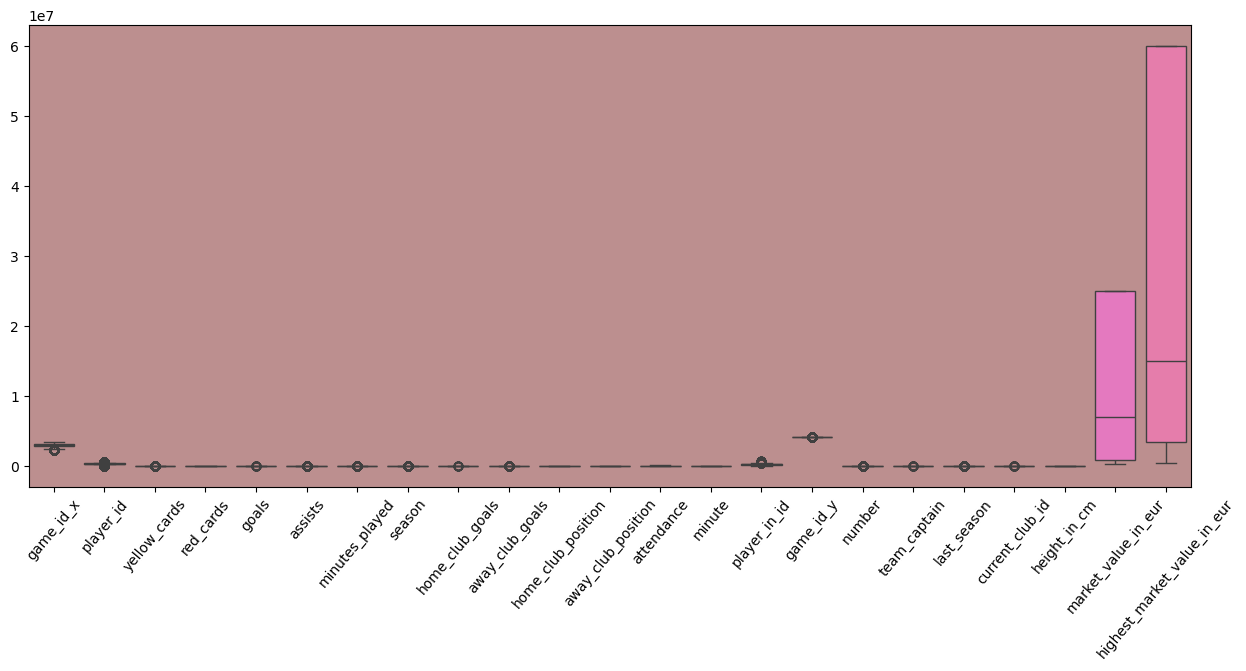

In [22]:
sns.boxplot(data = df)
plt.gcf().set_size_inches(15,6)
plt.gca().set_facecolor('rosybrown')
plt.xticks(rotation = 50)
plt.show()

- Players market value, goals scored, and attendance can vary significantly for each player,so on treating outlier it may affect the players performance

# 1. PERFORMANCE ANALYSIS

### - Descriptive analysis and visualizing

In [23]:
columns = ["goals", "assists", "yellow_cards", "red_cards", "minutes_played"]
summary = {}

for col in columns:
   summary[col] = {
     "Mean": df[col].mean(),
     "Median": df[col].median(),
     "Mode": df[col].mode()[0],
     "Standard Deviation": df[col].std(),
     "Variance": df[col].var(),
     "IQR": df[col].quantile(0.75) - df[col].quantile(0.25)
}
summary_df = pd.DataFrame(summary).T
print(summary_df)

                     Mean  Median  Mode  Standard Deviation    Variance   IQR
goals            0.482541     0.0   0.0            0.612516    0.375176   1.0
assists          0.143250     0.0   0.0            0.372444    0.138715   0.0
yellow_cards     0.154523     0.0   0.0            0.361499    0.130682   0.0
red_cards        0.000000     0.0   0.0            0.000000    0.000000   0.0
minutes_played  70.009348    75.0  90.0           20.993278  440.717734  28.0


### INTERPRETATION:
- Central Tendency:  On average, players score less than half a goal, have very few assists, receive few yellow cards, no red cards, and play about 70 minutes.
- Dispersion: There's significant variation in goals scored and minutes played, while assists, yellow cards, and red cards show less variability.

### 1) visualizing the top 10 players with highest goal scorers

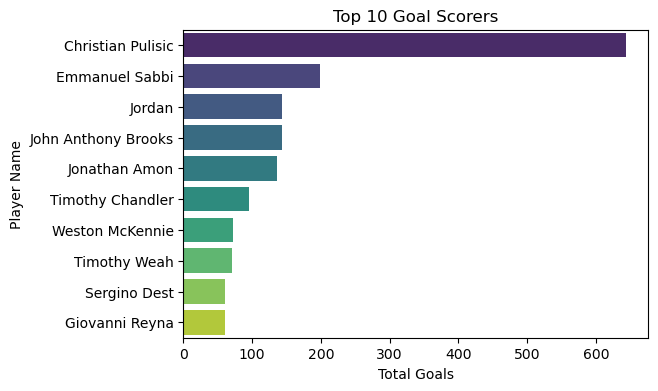

In [24]:
top_scorers = df.groupby("name", as_index=False)["goals"].sum()  #Ensures that the resulting DataFrame keeps "name" as a regular column instead of making it an index.
top_scorers = top_scorers.sort_values(by="goals", ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x="goals", y="name", data=top_scorers, palette="viridis")
plt.xlabel("Total Goals")
plt.ylabel("Player Name")
plt.title("Top 10 Goal Scorers")
plt.show()

### INTERPRETATION:
- Christian Pulisic is the top goal scorer among the visualized players, significantly outperforming the others.

### 2) Which players have the highest goal contributions (goals + assists) in the current season?

<Figure size 1200x600 with 0 Axes>

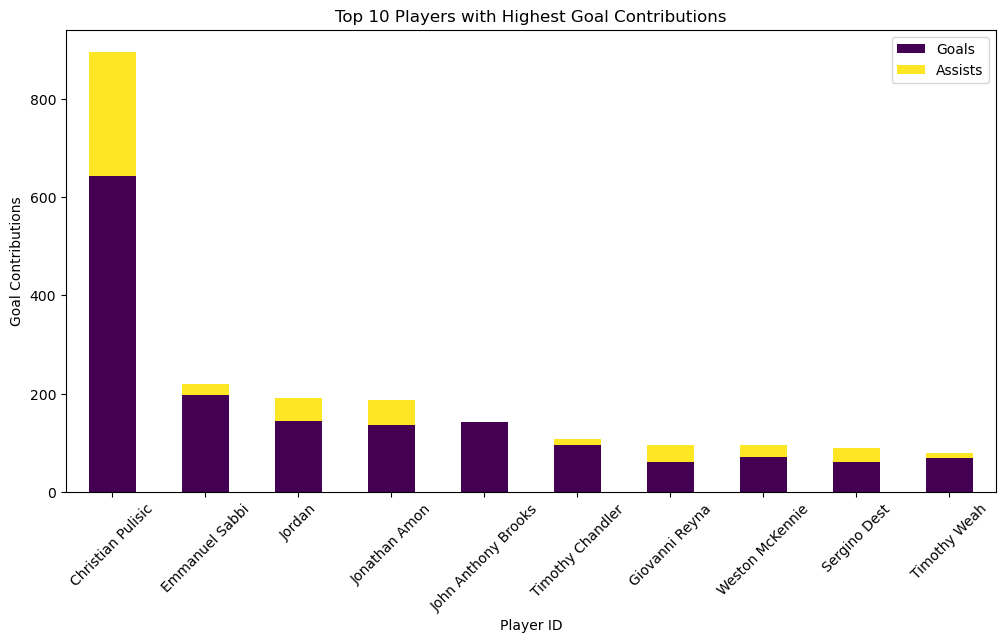

In [25]:
df['goal_contributions'] = df['goals'] + df['assists']
top_players = df.groupby('name')[['goals','assists','goal_contributions']].sum().nlargest(10,'goal_contributions')

plt.figure(figsize=(12, 6))
top_players[['goals', 'assists']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Player ID")
plt.ylabel("Goal Contributions")
plt.title("Top 10 Players with Highest Goal Contributions")
plt.legend(["Goals", "Assists"])
plt.xticks(rotation=45)
plt.show()

### INTERPRETATION:
- Christian Pulisic leads goal contributions by a huge margin, primarily as a goal-scorer. 

### 3) What is the trend of average attendance over different seasons?

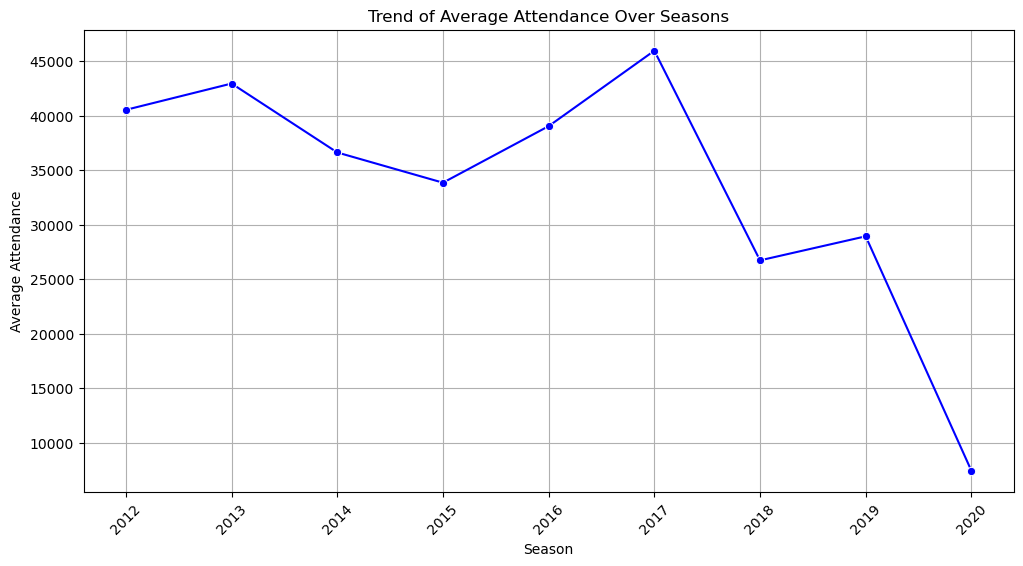

In [26]:
attendance_trend = df.groupby('season')['attendance'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_trend, x='season', y='attendance', marker='o', color='b')

plt.xlabel("Season")
plt.ylabel("Average Attendance")
plt.title("Trend of Average Attendance Over Seasons")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### INTERPRETATION:
- This bar chart displays the top 10 teams with the best home win percentages, while also showing their corresponding away win percentages for comparison.
- Average attendance fluctuated over the years, peaking in 2017 before a sharp decline in 2018 and a drastic drop in 2020,

### 4) How do yellow and red card trends vary across different competitions?

<Figure size 1200x600 with 0 Axes>

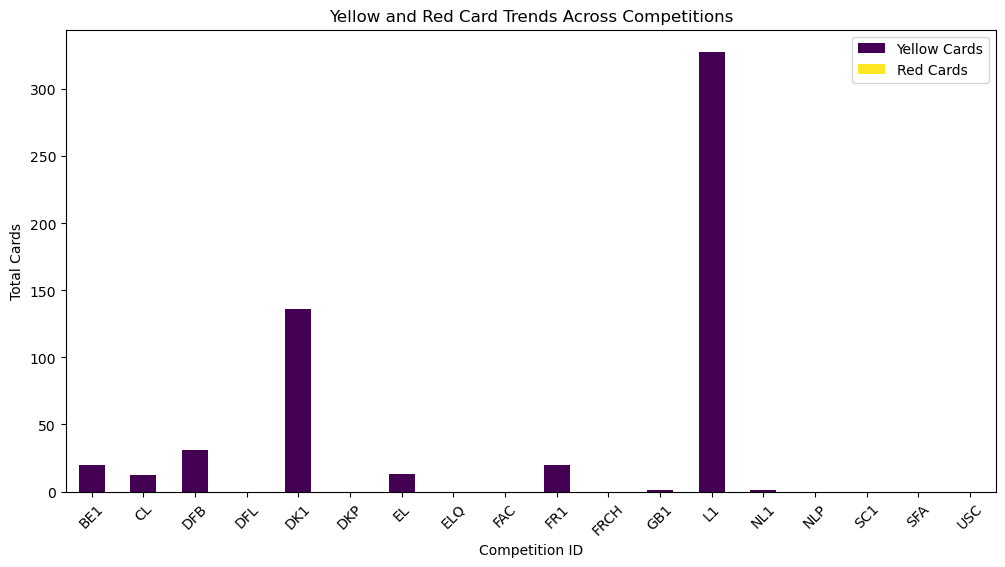

In [27]:
card_trends = df.groupby('competition_id_x')[['yellow_cards', 'red_cards']].sum().reset_index()

plt.figure(figsize=(12, 6))
card_trends.set_index('competition_id_x').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Competition ID")
plt.ylabel("Total Cards")
plt.title("Yellow and Red Card Trends Across Competitions")
plt.legend(["Yellow Cards", "Red Cards"])
plt.xticks(rotation=45)
plt.show()

### INTERPRETATION:
- Competition "L1" has the highest number of yellow cards, significantly more than others, while red cards are minimal across all competitions.

### - Probability

### What is the probability that a player who scores a goal also provides an assist in the same game? (Joint Probability)

In [28]:
players_with_goals = df[df['goals'] > 0]  #player scored at least one goal
players_with_goals_and_assists = players_with_goals[players_with_goals['assists'] > 0] #occurrences where a player also provided an assist in the same game
joint_probability = len(players_with_goals_and_assists) / len(players_with_goals)
print('The probability that a player who scores a goal also provides an assist in the same game is',joint_probability)

The probability that a player who scores a goal also provides an assist in the same game is 0.15678776290630975


In [29]:
#Conditional Probability - Assists Given Goals:
# If a player has scored a goal in a match, what is the probability that they also provided an assist?

players_scored_and_assisted = len(df[(df['goals'] > 0) & (df['assists'] > 0)])
players_scored = len(df[df['goals'] > 0])
prob_assist_given_goal = players_scored_and_assisted / players_scored
prob_assist_given_goal

0.15678776290630975

### - Normal distribution

### Is the distribution of player heights normally distributed? 

Text(0, 0.5, 'Frequency')

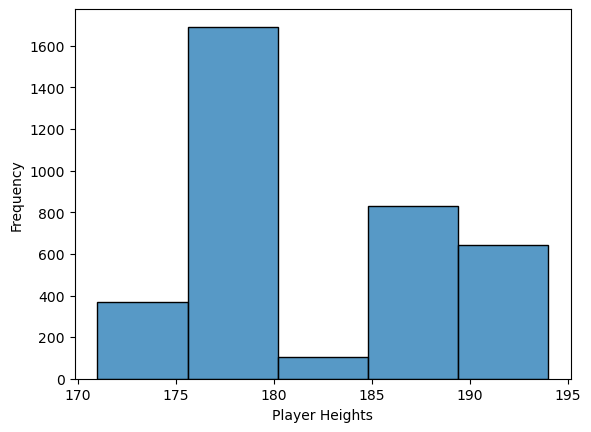

In [30]:
height_df=df[["height_in_cm"]]
height_df
sns.histplot(df["height_in_cm"],bins=5)
plt.xlabel("Player Heights")
plt.ylabel("Frequency")

- The distribution of player heights appears to be multimodal rather than normally distributed, with noticeable peaks around 175 cm and 185 cm.

### - Sampling technique

### How does the average market value of players vary when sampled across different leagues? 


In [31]:
grouped_df = df.groupby("competition_id_x")
leagues = df["competition_id_x"].unique()
strata_sample_df = []
for league in leagues:
    league_data = grouped_df.get_group(league)
    sample_data = league_data.sample(n=5, random_state=1)  
    strata_sample_df.append(sample_data)
print(strata_sample_df)
strata_sample_df_1 = pd.concat(strata_sample_df, ignore_index=True)

[       appearance_id  game_id_x  player_id competition_id_x  yellow_cards  \
928   2871503_315779    2871503     315779               L1             0   
1393  2872073_124732    2872073     124732               L1             1   
2327  3058637_124732    3058637     124732               L1             0   
620   2704283_315779    2704283     315779               L1             0   
1217   2871508_49723    2871508      49723               L1             0   

      red_cards  goals  assists  minutes_played  season  ... date_of_birth  \
928           0      1        1              86    2017  ...    1998-09-18   
1393          0      0        0              29    2017  ...    1993-01-28   
2327          0      1        0              90    2018  ...    1993-01-28   
620           0      1        1              45    2016  ...    1998-09-18   
1217          0      1        0              86    2017  ...    1990-03-29   

      sub_position  position_y   foot  height_in_cm market_value_in

In [ ]:
strata_sample_df_1

### INTERPRETATION:
- The code samples 5 players from each unique league in a dataset to analyze how average market value varies across leagues. 
- It uses stratified sampling to ensure representation from all leagues before calculating and comparing average market values.

### - Central limit theorm

### Using a sample of past matches, what is the estimated average number of goals per game, and how does the Central Limit Theorem apply when increasing the sample size?


In [32]:
minute_played=df.loc[:,["minutes_played"]]
minute_played["minutes_played"].unique()

array([ 70,  90,  58,  65,  84,  45, 120,  33,  23,  20,  61,  38,  10,
        62,  15,  89,  86,  78,  83,  55,  22,  40,  13,  73,  60,  66,
        67,  77,  31,  75,  76,  71,  46,  57,  69,  68,  27,   6,   8,
        74,  64,  82,  72,  37,  80,  56,  85,  59,  29,  17,  32,  63,
        21,  54,  79,  81,  19,  14,  87,  24,  26,  16,  88,  11,  34,
         9,  35,  49,  18,  12], dtype=int64)

In [33]:
p_mean=st.mean(minute_played["minutes_played"])
print("The population mean for the Minute Played is:",p_mean)
p_median=st.median(minute_played["minutes_played"])
print("The population median for the Minute Played is:",p_median)
p_std=st.stdev(minute_played["minutes_played"])
print("The Population standard Deviation for the Minutes Played is:",p_std)

The population mean for the Minute Played is: 70.0093483640363
The population median for the Minute Played is: 75
The Population standard Deviation for the Minutes Played is: 20.993278313932603


In [34]:
sample_40=minute_played.sample(n=40,replace=True,random_state=1)
s_mean=st.mean(sample_40["minutes_played"])
print("The sample mean for the minutes played is:",s_mean)
s_median=st.median(sample_40["minutes_played"])
print("The sample median for the minutes played is:",s_median)
s_std=st.stdev(sample_40["minutes_played"])
print("The standard deviation for the minutes played is:",s_std)

The sample mean for the minutes played is: 69.65
The sample median for the minutes played is: 77.0
The standard deviation for the minutes played is: 21.690775541454105


In [35]:
sample_data=pd.DataFrame()
for i in range(0,20):
    sample_data["sample"+str(i)]=minute_played["minutes_played"].sample(n=40,replace=True).reset_index(drop=True)
sample_data

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19
0,54,75,81,83,90,19,68,90,79,84,45,90,78,69,82,90,78,61,56,76
1,84,69,78,65,90,90,79,66,79,65,62,77,84,73,78,82,90,74,90,78
2,56,90,90,64,90,90,79,90,78,88,90,82,70,75,45,12,90,59,63,85
3,68,22,84,61,80,74,64,85,82,73,13,58,58,58,90,65,79,84,62,90
4,90,80,90,90,72,86,76,85,71,74,54,87,35,71,16,71,77,90,70,62
5,78,59,63,45,22,89,13,74,61,60,78,90,76,77,45,90,76,90,69,26
6,69,90,11,90,54,57,83,27,72,73,90,45,65,75,90,63,57,83,90,77
7,90,90,90,90,90,90,90,74,90,81,90,23,75,57,67,55,65,77,45,57
8,84,82,68,46,76,90,90,54,72,56,45,76,77,24,85,61,86,21,70,13
9,90,79,45,66,90,77,74,58,90,74,86,71,72,69,90,66,78,70,79,90


In [36]:
sample_mean=[]
sample_means=pd.DataFrame()
sample_name=sample_data.columns
for i in sample_name:
    sample_mean.append(sample_data[i].mean())
sample_means.insert(0,"sample_name",sample_name)
sample_means.insert(1,"sample_means_value",sample_mean)
sample_means

,sample_name,sample_means_value
0,sample0,74.000
1,sample1,71.725
2,sample2,69.850
3,sample3,71.525
4,sample4,66.275
5,sample5,73.175
6,sample6,74.275
7,sample7,65.950
8,sample8,74.525
9,sample9,73.400


In [37]:
std_dev=st.stdev(sample_means["sample_means_value"])
print("The std_dev for the sample 20 mean is:",std_dev)
c_std=p_std/m.sqrt(40)
print("The standard deviation from the Population paramter is:",c_std)

The std_dev for the sample 20 mean is: 3.4071931938952797
The standard deviation from the Population paramter is: 3.319328751292318


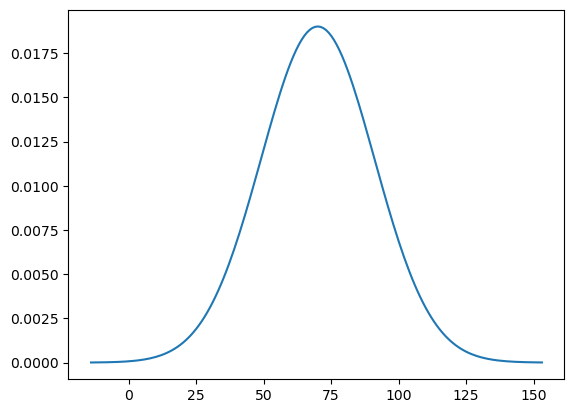

In [38]:
lower_p=p_mean-4*p_std
upper_p=p_mean+4*p_std
Arr=np.arange(lower_p,upper_p)
plt.plot(Arr,norm.pdf(Arr,p_mean,p_std))

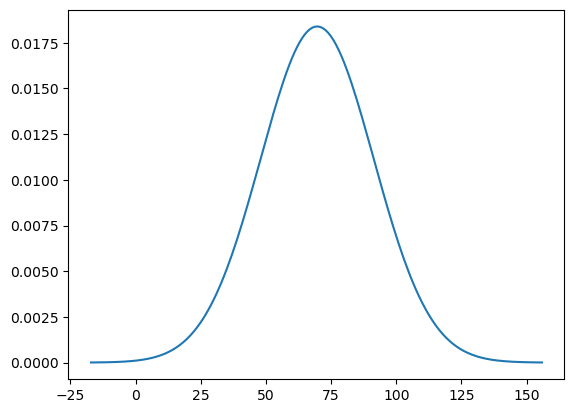

In [39]:
lower_p1=s_mean-4*s_std
upper_p1=s_mean+4*s_std
Arr2=np.arange(lower_p1,upper_p1)
plt.plot(Arr2,norm.pdf(Arr2,s_mean,s_std))

The Central Limit Theorem (CLT) states that, regardless of the population distribution, the sampling distribution of the sample mean approaches a normal distribution as the sample size increases.
For the population and the sample it shows a Normally distrubuted curve .Hence it is Proved CLT Theorem.

### - Logistic regression

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

### Can we predict whether a player will receive a yellow card in a game based on their playing position, minutes played, and competition_type ?
(Binary Classification: Yes/No)

- dependent (target) -- yellow card
- independent (features) -- playing position, minutes played, competition_type

In [ ]:
df.columns

In [41]:
 df_features = df[['position_x','position_y','minutes_played','goals','assists','foot']]
 df_features
 one_col = df['yellow_cards']

In [42]:
 encoder = preprocessing.LabelEncoder()
 df_features['position_x_enc'] = encoder.fit_transform(df_features['position_x'])
 df_features['foot_enc'] = encoder.fit_transform(df_features['foot'])
 df_features['position_y_enc'] = encoder.fit_transform(df_features['position_y'])

In [43]:
 df_features

,position_x,position_y,minutes_played,goals,assists,foot,position_x_enc,foot_enc,position_y_enc
0,Right-Back,Defender,70,0,0,right,9,2,1
1,Right-Back,Defender,70,0,0,right,9,2,1
2,Right-Back,Defender,70,0,0,right,9,2,1
3,Right-Back,Defender,70,0,0,right,9,2,1
4,Right-Back,Defender,70,0,0,right,9,2,1
...,...,...,...,...,...,...,...,...,...
3632,Centre-Forward,Attack,77,1,0,right,3,2,0
3633,Centre-Forward,Attack,77,1,0,right,3,2,0
3634,Centre-Forward,Attack,77,1,0,right,3,2,0
3635,Centre-Forward,Attack,77,1,0,right,3,2,0


In [44]:
 df_features = df_features.drop(['position_x','position_y','foot'],axis=1)
 df_features

,minutes_played,goals,assists,position_x_enc,foot_enc,position_y_enc
0,70,0,0,9,2,1
1,70,0,0,9,2,1
2,70,0,0,9,2,1
3,70,0,0,9,2,1
4,70,0,0,9,2,1
...,...,...,...,...,...,...
3632,77,1,0,3,2,0
3633,77,1,0,3,2,0
3634,77,1,0,3,2,0
3635,77,1,0,3,2,0


In [45]:
 cols = df_features.columns
 scaler = StandardScaler()
 df_scaled = scaler.fit_transform(df_features)
 df_scaled = pd.DataFrame(df_scaled,columns=cols)
 df_scaled

,minutes_played,goals,assists,position_x_enc,foot_enc,position_y_enc
0,-0.000445,-0.787909,-0.384674,1.158142,0.431977,0.618899
1,-0.000445,-0.787909,-0.384674,1.158142,0.431977,0.618899
2,-0.000445,-0.787909,-0.384674,1.158142,0.431977,0.618899
3,-0.000445,-0.787909,-0.384674,1.158142,0.431977,0.618899
4,-0.000445,-0.787909,-0.384674,1.158142,0.431977,0.618899
...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,0.431977,-0.707522
3633,0.333041,0.844925,-0.384674,-1.008236,0.431977,-0.707522
3634,0.333041,0.844925,-0.384674,-1.008236,0.431977,-0.707522
3635,0.333041,0.844925,-0.384674,-1.008236,0.431977,-0.707522


In [46]:
 new_data = pd.concat([df_scaled,one_col],axis=1)
 

In [47]:
 corr = abs(new_data.corr()>=0.7)
 corr

,minutes_played,goals,assists,position_x_enc,foot_enc,position_y_enc,yellow_cards
minutes_played,True,False,False,False,False,False,False
goals,False,True,False,False,False,False,False
assists,False,False,True,False,False,False,False
position_x_enc,False,False,False,True,False,False,False
foot_enc,False,False,False,False,True,False,False
position_y_enc,False,False,False,False,False,True,False
yellow_cards,False,False,False,False,False,False,True


<Axes: >

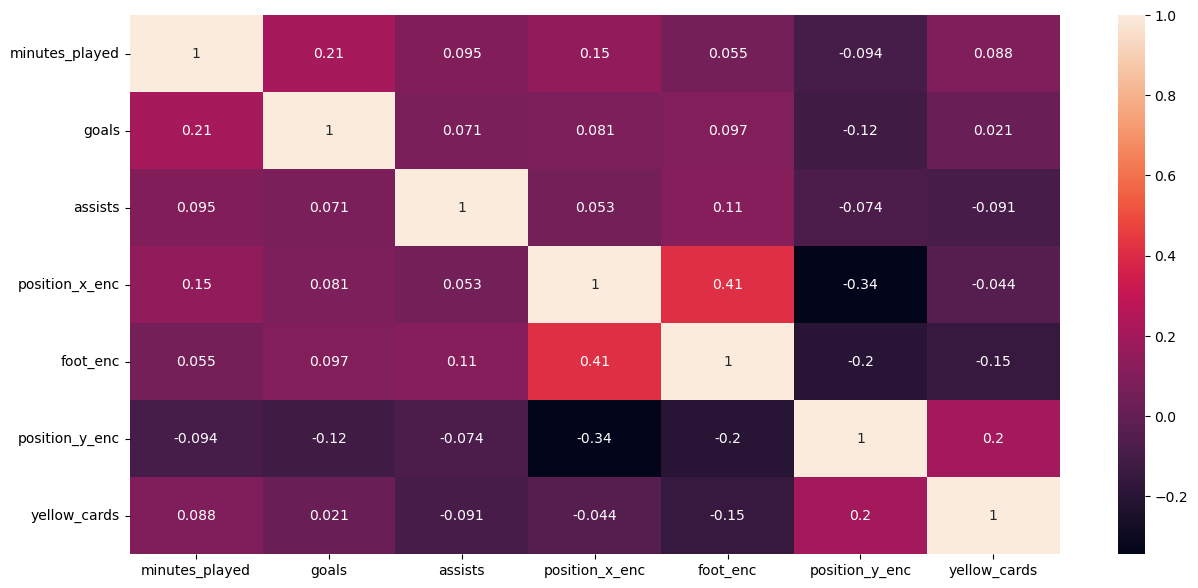

In [48]:
 fig,ax = plt.subplots(figsize=(15,7))
 sns.heatmap(new_data.corr(),annot=True)

In [49]:
 log_train,log_test = train_test_split(new_data,train_size=0.8,random_state=200)
 print(log_train.shape)
 print(log_test.shape)

(2909, 7)
(728, 7)


In [50]:
 X_train = log_train.drop(columns='yellow_cards',axis=1)
 y_train = log_train['yellow_cards']
 X_test = log_test.drop(columns='yellow_cards',axis=1)
 y_test = log_test['yellow_cards']

In [51]:
 print(X_train.shape)
 print(y_train.shape)
 print(X_test.shape)
 print(y_test.shape)

(2909, 6)
(2909,)
(728, 6)
(728,)


In [52]:
 logreg = LogisticRegression().fit(X_train,y_train)
 logreg

LogisticRegression()

In [53]:
 y_pred = logreg.predict(X_test)
 y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
 print(confusion_matrix(y_test,y_pred))
 tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
 print(tn,fp,fn,tp)

[[614   2]
 [109   3]]
614 2 109 3


In [55]:
 print('Recall score :',recall_score(y_test,y_pred))
 print('f1_score :',f1_score(y_test,y_pred))
 print('accuracy_score:',accuracy_score(y_test,y_pred))
 print('precision_score:',precision_score(y_test,y_pred))

Recall score : 0.026785714285714284
f1_score : 0.05128205128205128
accuracy_score: 0.8475274725274725
precision_score: 0.6


In [56]:
 roc = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
 print(roc)

0.7345054499072357


<Figure size 700x500 with 0 Axes>

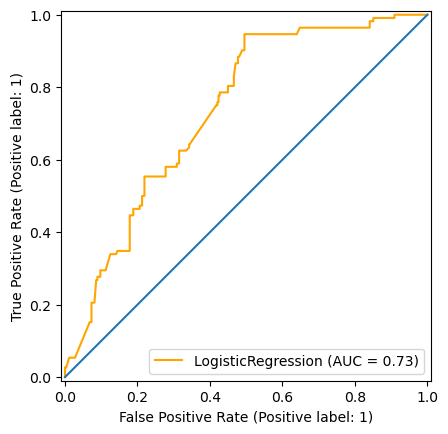

In [57]:
 plt.figure(figsize=(7,5))
 RocCurveDisplay.from_estimator(logreg,X_test,y_test,color='orange')
 plt.plot([0,1],[0,1])

### INTERPRETATION
Evaluation Metrics:
- Recall (0.0268 or ~2.7%):
The recall score is very low, meaning the model fails to capture most of the actual positive cases. It only identifies about 2.7% of the true positives, missing 97.3% of them.
This is concerning if the positive class is critical (e.g., fraud detection, medical diagnosis).

- F1-score (0.0513 or ~5.1%):
The F1-score is low, indicating poor balance between precision and recall. This suggests the model does not perform well in handling imbalanced classes.

- Accuracy (0.8475 or ~84.75%):
Accuracy appears high, but since the dataset is imbalanced (with far more negative than positive cases), this metric is misleading. The model is predicting the majority class (negative) well but failing on the minority class (positive).

- Precision (0.6 or 60%):
Precision is relatively high, meaning that when the model predicts a positive case, it is correct 60% of the time. However, since the recall is so low, this indicates the model is overly conservative in predicting positives.

- ROC-AUC Score (0.735 or 73.5%):
The AUC-ROC score suggests that the model has moderate discrimination ability between the two classes. This is not terrible but could be improved.

### logistic regression - 2

- dependent (target) -- yellow card
- independent (features) -- position_x, minutes played, referee

In [ ]:
df.columns

In [58]:
 df_features = df[['position_x','position_y','minutes_played','goal_contributions']]
 df_features
 one_col = df['yellow_cards']

In [59]:
 df_features

,position_x,position_y,minutes_played,goal_contributions
0,Right-Back,Defender,70,0
1,Right-Back,Defender,70,0
2,Right-Back,Defender,70,0
3,Right-Back,Defender,70,0
4,Right-Back,Defender,70,0
...,...,...,...,...
3632,Centre-Forward,Attack,77,1
3633,Centre-Forward,Attack,77,1
3634,Centre-Forward,Attack,77,1
3635,Centre-Forward,Attack,77,1


In [60]:
 encoder = preprocessing.LabelEncoder()
 df_features['position_x_enc'] = encoder.fit_transform(df_features['position_x'])
 df_features['position_y_enc'] = encoder.fit_transform(df_features['position_y'])


In [ ]:
 df_features

In [61]:
 df_features = df_features.drop(['position_x','position_y'],axis=1)
 

In [62]:
 cols = df_features.columns
 scaler = StandardScaler()
 df_scaled = scaler.fit_transform(df_features)
 df_scaled = pd.DataFrame(df_scaled,columns=cols)
 df_scaled

,minutes_played,goal_contributions,position_x_enc,position_y_enc
0,-0.000445,-0.846923,1.158142,0.618899
1,-0.000445,-0.846923,1.158142,0.618899
2,-0.000445,-0.846923,1.158142,0.618899
3,-0.000445,-0.846923,1.158142,0.618899
4,-0.000445,-0.846923,1.158142,0.618899
...,...,...,...,...
3632,0.333041,0.506442,-1.008236,-0.707522
3633,0.333041,0.506442,-1.008236,-0.707522
3634,0.333041,0.506442,-1.008236,-0.707522
3635,0.333041,0.506442,-1.008236,-0.707522


In [63]:
 new_data = pd.concat([df_scaled,one_col],axis=1)
 

<Axes: >

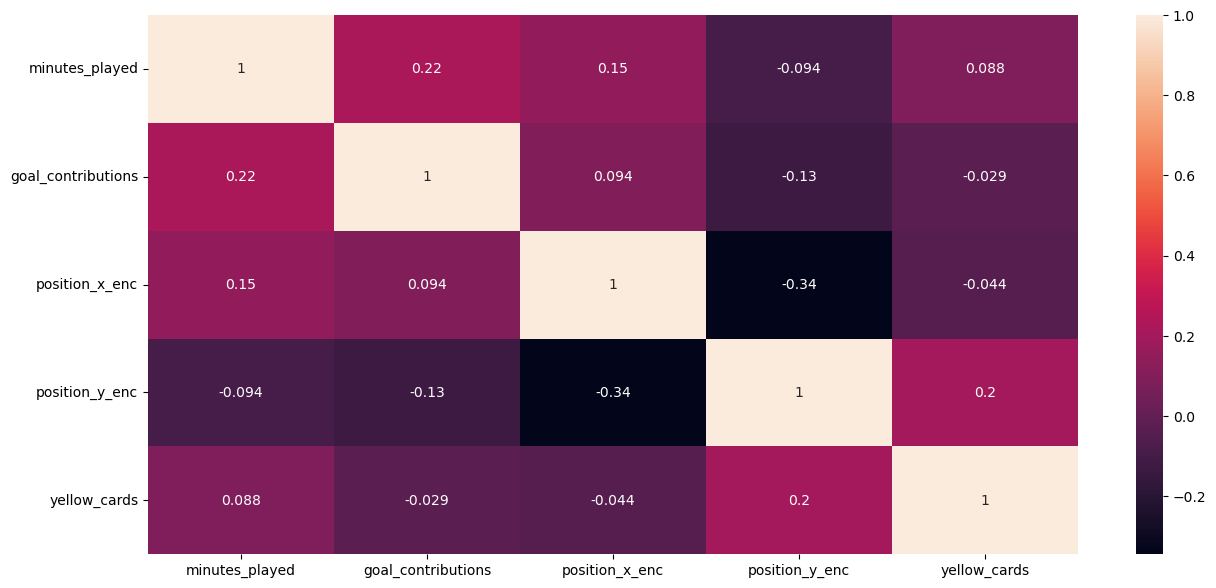

In [64]:
 fig,ax = plt.subplots(figsize=(15,7))
 sns.heatmap(new_data.corr(),annot=True)

In [65]:
 log_train,log_test = train_test_split(new_data,train_size=0.8,random_state=200)
 print(log_train.shape)
 print(log_test.shape)

(2909, 5)
(728, 5)


In [66]:
 X_train = log_train.drop(columns='yellow_cards',axis=1)
 y_train = log_train['yellow_cards']
 X_test = log_test.drop(columns='yellow_cards',axis=1)
 y_test = log_test['yellow_cards']

In [67]:
 print(X_train.shape)
 print(y_train.shape)
 print(X_test.shape)
 print(y_test.shape)

(2909, 4)
(2909,)
(728, 4)
(728,)


In [68]:
 logreg = LogisticRegression().fit(X_train,y_train)
 logreg

LogisticRegression()

In [69]:
 y_pred = logreg.predict(X_test)
 y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
 print(confusion_matrix(y_test,y_pred))
 tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
 print(tn,fp,fn,tp)

[[616   0]
 [112   0]]
616 0 112 0


In [71]:
 print('Recall score :',recall_score(y_test,y_pred))
 print('f1_score :',f1_score(y_test,y_pred))
 print('accuracy_score:',accuracy_score(y_test,y_pred))
 print('precision_score:',precision_score(y_test,y_pred))

Recall score : 0.0
f1_score : 0.0
accuracy_score: 0.8461538461538461
precision_score: 0.0


In [72]:
 roc = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
 print(roc)

0.7141842532467533


<Figure size 700x500 with 0 Axes>

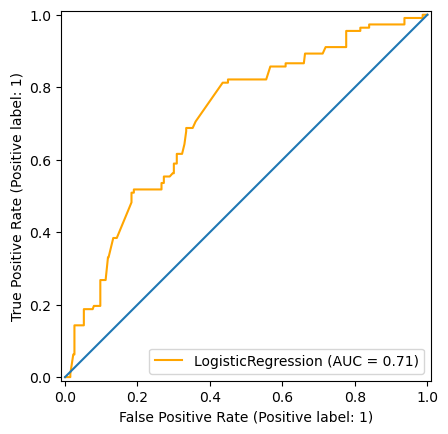

In [73]:
 plt.figure(figsize=(7,5))
 RocCurveDisplay.from_estimator(logreg,X_test,y_test,color='orange')
 plt.plot([0,1],[0,1])

### logistic regression - 3

### Can we predict whether a player will score a goal in a match?

- target - goals 
- features - minutes_played, position_x, goal_contributions, home_club_position, away_club_position, competition_type

In [ ]:
df.columns

In [74]:
df_features = df[['position_x','minutes_played','competition_type','yellow_cards','red_cards']]
df_features
one_col = df[['goals']]

In [ ]:
df_features


In [75]:
one_col

,goals
0,0
1,0
2,0
3,0
4,0
...,...
3632,1
3633,1
3634,1
3635,1


In [76]:
one_col.loc[one_col["goals"] >= 1, "goals"] = 1

In [77]:
one_col['goals'].value_counts()

goals
0    2068
1    1569
Name: count, dtype: int64

In [78]:
df_features

,position_x,minutes_played,competition_type,yellow_cards,red_cards
0,Right-Back,70,domestic_league,0,0
1,Right-Back,70,domestic_league,0,0
2,Right-Back,70,domestic_league,0,0
3,Right-Back,70,domestic_league,0,0
4,Right-Back,70,domestic_league,0,0
...,...,...,...,...,...
3632,Centre-Forward,77,domestic_league,0,0
3633,Centre-Forward,77,domestic_league,0,0
3634,Centre-Forward,77,domestic_league,0,0
3635,Centre-Forward,77,domestic_league,0,0


In [79]:
one_col['goals'].unique()

array([0, 1], dtype=int64)

In [80]:
encoder = preprocessing.LabelEncoder()
df_features['position_x_enc'] = encoder.fit_transform(df_features['position_x'])
df_features['competition_type_enc'] = encoder.fit_transform(df_features['competition_type'])

In [81]:
df_features = df_features.drop(['position_x','competition_type'],axis=1)
df_features

,minutes_played,yellow_cards,red_cards,position_x_enc,competition_type_enc
0,70,0,0,9,1
1,70,0,0,9,1
2,70,0,0,9,1
3,70,0,0,9,1
4,70,0,0,9,1
...,...,...,...,...,...
3632,77,0,0,3,1
3633,77,0,0,3,1
3634,77,0,0,3,1
3635,77,0,0,3,1


In [82]:
cols = df_features.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled

,minutes_played,yellow_cards,red_cards,position_x_enc,competition_type_enc
0,-0.000445,-0.427509,0.0,1.158142,-0.014365
1,-0.000445,-0.427509,0.0,1.158142,-0.014365
2,-0.000445,-0.427509,0.0,1.158142,-0.014365
3,-0.000445,-0.427509,0.0,1.158142,-0.014365
4,-0.000445,-0.427509,0.0,1.158142,-0.014365
...,...,...,...,...,...
3632,0.333041,-0.427509,0.0,-1.008236,-0.014365
3633,0.333041,-0.427509,0.0,-1.008236,-0.014365
3634,0.333041,-0.427509,0.0,-1.008236,-0.014365
3635,0.333041,-0.427509,0.0,-1.008236,-0.014365


In [83]:
new_data = pd.concat([df_scaled,one_col],axis=1)
new_data

,minutes_played,yellow_cards,red_cards,position_x_enc,competition_type_enc,goals
0,-0.000445,-0.427509,0.0,1.158142,-0.014365,0
1,-0.000445,-0.427509,0.0,1.158142,-0.014365,0
2,-0.000445,-0.427509,0.0,1.158142,-0.014365,0
3,-0.000445,-0.427509,0.0,1.158142,-0.014365,0
4,-0.000445,-0.427509,0.0,1.158142,-0.014365,0
...,...,...,...,...,...,...
3632,0.333041,-0.427509,0.0,-1.008236,-0.014365,1
3633,0.333041,-0.427509,0.0,-1.008236,-0.014365,1
3634,0.333041,-0.427509,0.0,-1.008236,-0.014365,1
3635,0.333041,-0.427509,0.0,-1.008236,-0.014365,1


In [84]:
log_train,log_test = train_test_split(new_data,train_size=0.7,random_state=100)
print(log_train.shape)
print(log_test.shape)

(2545, 6)
(1092, 6)


In [85]:
X_train = log_train.drop(columns='goals',axis=1)
y_train = log_train['goals']
X_test = log_test.drop(columns='goals',axis=1)
y_test = log_test['goals']

In [86]:
y_test

263     0
595     1
2543    1
1058    0
1883    0
       ..
1512    1
3146    0
1625    1
3377    0
3026    0
Name: goals, Length: 1092, dtype: int64

In [87]:
logreg = LogisticRegression().fit(X_train,y_train)
logreg

LogisticRegression()

In [88]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

[[529  79]
 [286 198]]
529 79 286 198


In [90]:
print('Recall score :',recall_score(y_test,y_pred,average='micro'))
print('f1_score :',f1_score(y_test,y_pred,average='micro'))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred,average='micro'))

Recall score : 0.6657509157509157
f1_score : 0.6657509157509157
accuracy_score: 0.6657509157509157
precision_score: 0.6657509157509157


In [91]:
roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(roc)

0.6756555159852109


- Recall Score (0.66)
This means that 66% of the actual positive cases were correctly identified by the model.
High recall indicates that the model is not missing many positive instances, which is important in cases where false negatives are costly (e.g., medical diagnosis, fraud detection).
- Precision Score (0.66)
This means that 66% of the predicted positive cases were actually correct.
High precision indicates that the model makes fewer false positive errors, which is important when false positives have high consequences (e.g., spam filtering, legal decisions).
- F1 Score (0.66)
The F1 score is the harmonic mean of precision and recall, balancing both.
Since F1 is also 0.66, it suggests that the model has a good balance between precision and recall, meaning it is neither favoring false positives nor false negatives excessively.
- Accuracy Score (0.66)
The model correctly classified  of all samples in the dataset.

- Moderate performance, but improvements are needed

<Figure size 700x500 with 0 Axes>

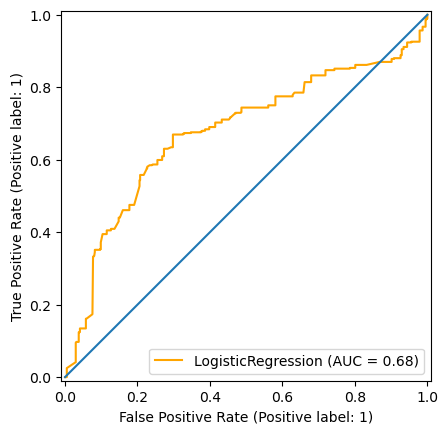

In [92]:
plt.figure(figsize=(7,5))
RocCurveDisplay.from_estimator(logreg,X_test,y_test,color='orange')
plt.plot([0,1],[0,1])

# 2. Player Profile and Market Value: 

### Descriptive analysis and visualization

In [93]:
def descriptive_analysis(col):
    Mean=st.mean(df[col])
    print(f"The mean for the Numerical Columns of {col} is:",Mean)
    Median=st.median(df[col])
    print(f"The median for the Numerical Columns {col}is:{Median}")
    Mode=st.mode(df[col])
    print(f"The Mode for the Numerical Columns{col}  is:{Mode}")
    Standard_devaition=st.stdev(df[col])
    print(f"The Standard Deviation for the Numerical Columns{col} is {Standard_devaition}")
    Variance=st.variance(df[col])
    print(f"The Variance for the Numerical columns{col} is:{Variance}")
    Max=max(df[col])
    print(f"The maximum for the Numerical columns {col}is:{Max}")
    Min=min(df[col])
    print(f"The minimum for the Numerical columns{col} is:{min}")
    Range=Max-Min
    print(f"The range for the Numerical columns{col} is:{Range}")
    print("-----------------------------------------------------")

In [94]:
numeric = df.select_dtypes(exclude=['object','category'])
numeric = numeric.drop(['date','date_of_birth'],axis=1)

In [ ]:
numeric.info()

In [95]:
for i in numeric.columns:
    descriptive_analysis(i)

The mean for the Numerical Columns of game_id_x is: 2974846.3266428374
The median for the Numerical Columns game_id_xis:3058692
The Mode for the Numerical Columnsgame_id_x  is:3219381
The Standard Deviation for the Numerical Columnsgame_id_x is 280262.62602603826
The Variance for the Numerical columnsgame_id_x is:78547139547.01099
The maximum for the Numerical columns game_id_xis:3450613
The minimum for the Numerical columnsgame_id_x is:<built-in function min>
The range for the Numerical columnsgame_id_x is:1219213
-----------------------------------------------------
The mean for the Numerical Columns of player_id is: 310908.73714599945
The median for the Numerical Columns player_idis:315779
The Mode for the Numerical Columnsplayer_id  is:315779
The Standard Deviation for the Numerical Columnsplayer_id is 126683.19315902423
The Variance for the Numerical columnsplayer_id is:16048631428.966642
The maximum for the Numerical columns player_idis:544931
The minimum for the Numerical column

TypeError: can't convert type 'Timestamp' to numerator/denominator

### 1) How is the market value of players distributed across different positions?


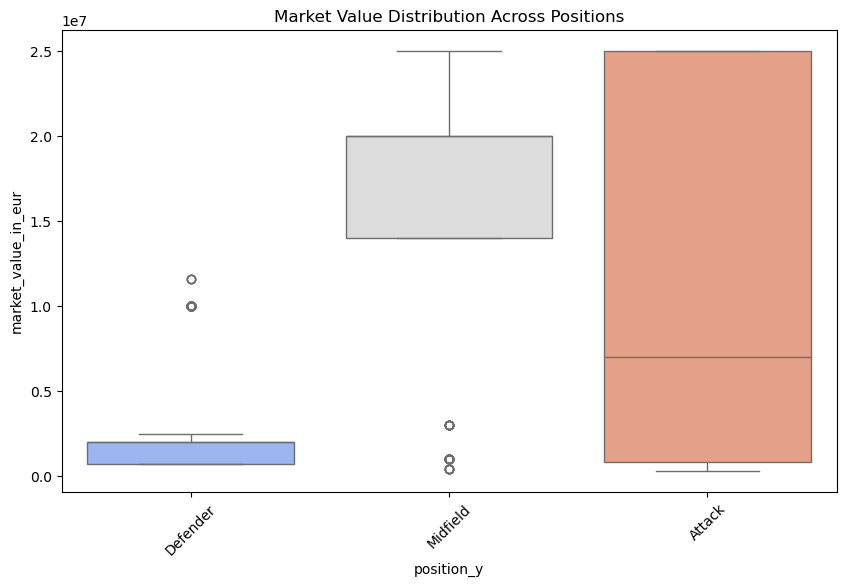

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x="position_y", y="market_value_in_eur", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Market Value Distribution Across Positions")
plt.show()

### INTERPRETATION:
- The boxplot shows the distribution of market values for players across different positions (Defender, Midfield, Attack).
- Attackers generally command the highest market values, while Defenders have the lowest, with Midfielders falling in between.

### 2) What is the correlation between height and market value?

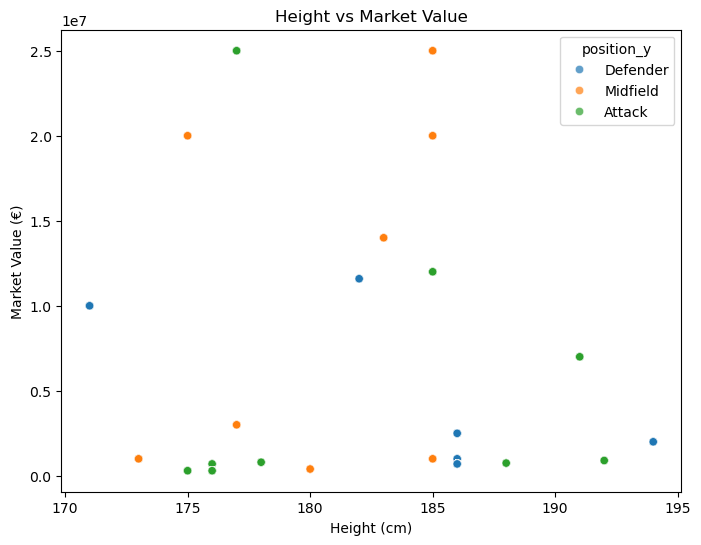

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["height_in_cm"], y=df["market_value_in_eur"], hue=df["position_y"], palette="tab10", alpha=0.7)
plt.title("Height vs Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (€)")
plt.show()

### INTERPRETATION:
- The scatter plot visualizes the relationship between player height and market value, categorized by position.
- There's no strong linear correlation between height and market value, though attackers tend to have higher market values regardless of height.

### 3) Which player attributes (Goals, Assists, Minutes Played) have the highest impact on market value?


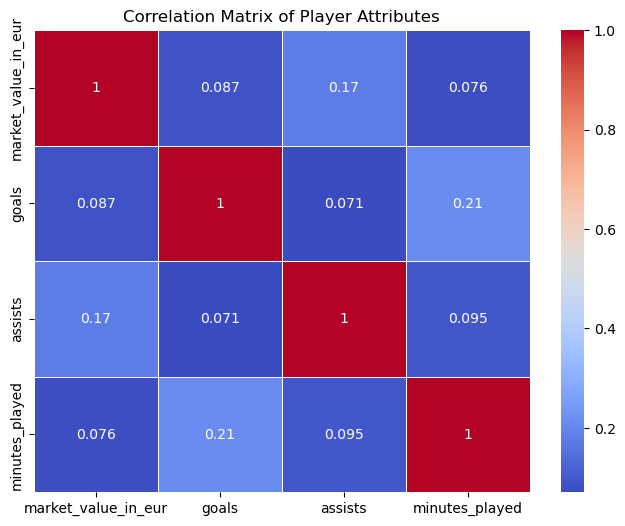

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['market_value_in_eur', 'goals', 'assists', 'minutes_played']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Player Attributes")
plt.show()

### INTERPRETATION:
- The heatmap displays a correlation matrix showing weak positive relationships between player attributes like market value, goals, assists, and minutes played.
- The strongest correlation appears to be between goals and minutes played (0.21), while others are even weaker, suggesting limited predictive power between these features.

### 4) How do players from different countries compare in terms of average market value?


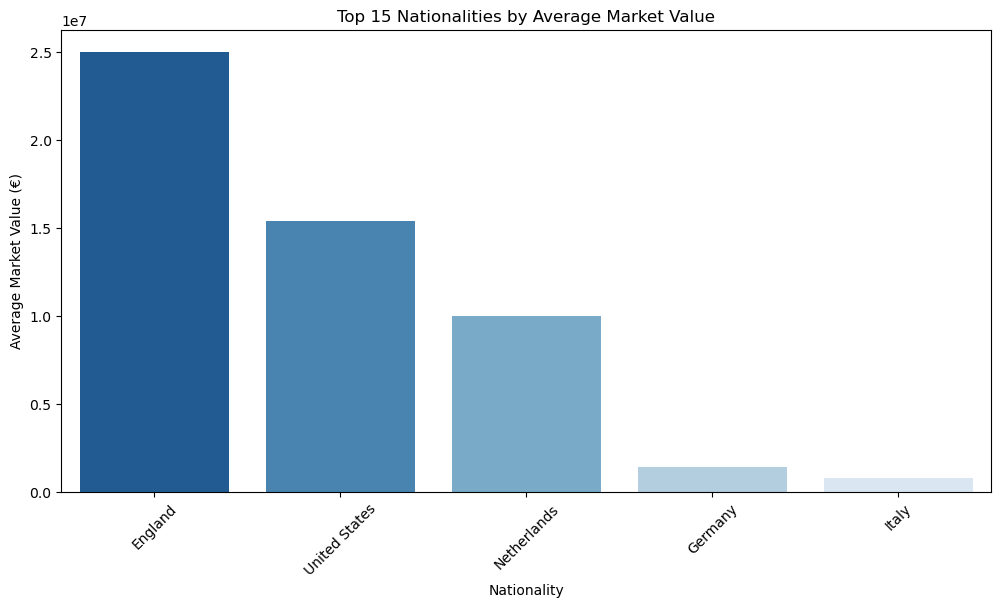

In [99]:
# Grouping by Nationality
avg_value_by_country = df.groupby("country_of_birth")["market_value_in_eur"].mean().sort_values(ascending=False).head(15)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_value_by_country.index, y=avg_value_by_country.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 15 Nationalities by Average Market Value")
plt.xlabel("Nationality")
plt.ylabel("Average Market Value (€)")
plt.show()

### INTERPRETATION:
- The bar chart displays the top 5 nationalities with the highest average player market value, revealing England has significantly higher average player values than other represented nations.  
- The United States, Netherlands, Germany, and Italy follow in descending order, with Italy exhibiting the lowest average market value among the top 5.

### - Multiple linear regression

### Which features (goals, assists, minutes played, yellow cards, height, foot preference, postx, posty) have the most significant impact on predicting a football player's market value?

In [100]:
test_data = pd.read_excel('test data.xlsx')
test_data=test_data.drop(['Unnamed: 0'],axis=1)
test_data.columns

Index(['appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [101]:
mul_df = df.copy()
mul_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'goal_contributions'],
      dtype='object')

In [102]:
mul_data = mul_df[['goals','assists','minutes_played','yellow_cards','height_in_cm','foot','position_x','position_y','market_value_in_eur']]
mul_data

,goals,assists,minutes_played,yellow_cards,height_in_cm,foot,position_x,position_y,market_value_in_eur
0,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
1,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
2,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
3,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
4,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
...,...,...,...,...,...,...,...,...,...
3632,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3633,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3634,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3635,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0


In [103]:
test_data1 = test_data[['goals','assists','minutes_played','yellow_cards','height_in_cm','foot','position_x','position_y','market_value_in_eur']]
test_data1

,goals,assists,minutes_played,yellow_cards,height_in_cm,foot,position_x,position_y,market_value_in_eur
0,0,0,58,0,177,right,Midfield,Right Midfield,3000000
1,0,0,58,0,177,right,Midfield,Central Midfield,3000000


In [104]:
mul_reg1 = pd.concat([mul_data,test_data1],ignore_index=True)
mul_reg1

,goals,assists,minutes_played,yellow_cards,height_in_cm,foot,position_x,position_y,market_value_in_eur
0,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
1,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
2,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
3,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
4,0,0,70,0,186.0,right,Right-Back,Defender,700000.0
...,...,...,...,...,...,...,...,...,...
3634,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3635,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3636,1,0,77,0,176.0,right,Centre-Forward,Attack,300000.0
3637,0,0,58,0,177.0,right,Midfield,Right Midfield,3000000.0


In [105]:
encoder = preprocessing.LabelEncoder()
mul_reg1['position_x_n'] = encoder.fit_transform(mul_reg1['position_x'])
mul_reg1['position_y_n'] = encoder.fit_transform(mul_reg1['position_y'])
mul_reg1['foot_n'] = encoder.fit_transform(mul_reg1['foot'])

In [106]:
mul_df1 = mul_reg1.drop(['position_x','position_y','foot'],axis=1)
mul_df1

,goals,assists,minutes_played,yellow_cards,height_in_cm,market_value_in_eur,position_x_n,position_y_n,foot_n
0,0,0,70,0,186.0,700000.0,10,2,2
1,0,0,70,0,186.0,700000.0,10,2,2
2,0,0,70,0,186.0,700000.0,10,2,2
3,0,0,70,0,186.0,700000.0,10,2,2
4,0,0,70,0,186.0,700000.0,10,2,2
...,...,...,...,...,...,...,...,...,...
3634,1,0,77,0,176.0,300000.0,3,0,2
3635,1,0,77,0,176.0,300000.0,3,0,2
3636,1,0,77,0,176.0,300000.0,3,0,2
3637,0,0,58,0,177.0,3000000.0,7,4,2


In [107]:
one_col = mul_df1[['yellow_cards']]
one_col

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3634,0
3635,0
3636,0
3637,0


In [108]:
mul_df1 = mul_df1.drop(['yellow_cards'],axis=1)
mul_df1

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,position_x_n,position_y_n,foot_n
0,0,0,70,186.0,700000.0,10,2,2
1,0,0,70,186.0,700000.0,10,2,2
2,0,0,70,186.0,700000.0,10,2,2
3,0,0,70,186.0,700000.0,10,2,2
4,0,0,70,186.0,700000.0,10,2,2
...,...,...,...,...,...,...,...,...
3634,1,0,77,176.0,300000.0,3,0,2
3635,1,0,77,176.0,300000.0,3,0,2
3636,1,0,77,176.0,300000.0,3,0,2
3637,0,0,58,177.0,3000000.0,7,4,2


In [109]:
mul_df2=mul_df1.iloc[:-2]
mul_df2

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,position_x_n,position_y_n,foot_n
0,0,0,70,186.0,700000.0,10,2,2
1,0,0,70,186.0,700000.0,10,2,2
2,0,0,70,186.0,700000.0,10,2,2
3,0,0,70,186.0,700000.0,10,2,2
4,0,0,70,186.0,700000.0,10,2,2
...,...,...,...,...,...,...,...,...
3632,1,0,77,176.0,300000.0,3,0,2
3633,1,0,77,176.0,300000.0,3,0,2
3634,1,0,77,176.0,300000.0,3,0,2
3635,1,0,77,176.0,300000.0,3,0,2


In [110]:
cols = mul_df2.columns
scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(mul_df2)
df_scaled1 = pd.DataFrame(df_scaled1,columns=cols)
df_scaled1

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,position_x_n,position_y_n,foot_n
0,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977
1,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977
2,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977
3,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977
4,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977
...,...,...,...,...,...,...,...,...
3632,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977
3633,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977
3634,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977
3635,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977


In [111]:
one_col=one_col.iloc[:-2]
one_col

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3632,0
3633,0
3634,0
3635,0


In [112]:
new1 = pd.concat([df_scaled1,one_col],axis=1)
new1

,goals,assists,minutes_played,height_in_cm,market_value_in_eur,position_x_n,position_y_n,foot_n,yellow_cards
0,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977,0
1,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977,0
2,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977,0
3,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977,0
4,-0.787909,-0.384674,-0.000445,0.679979,-1.004958,1.126672,0.901251,0.431977,0
...,...,...,...,...,...,...,...,...,...
3632,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977,0
3633,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977,0
3634,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977,0
3635,0.844925,-0.384674,0.333041,-0.882692,-1.041870,-1.042246,-0.747982,0.431977,0


<function matplotlib.pyplot.show(close=None, block=None)>

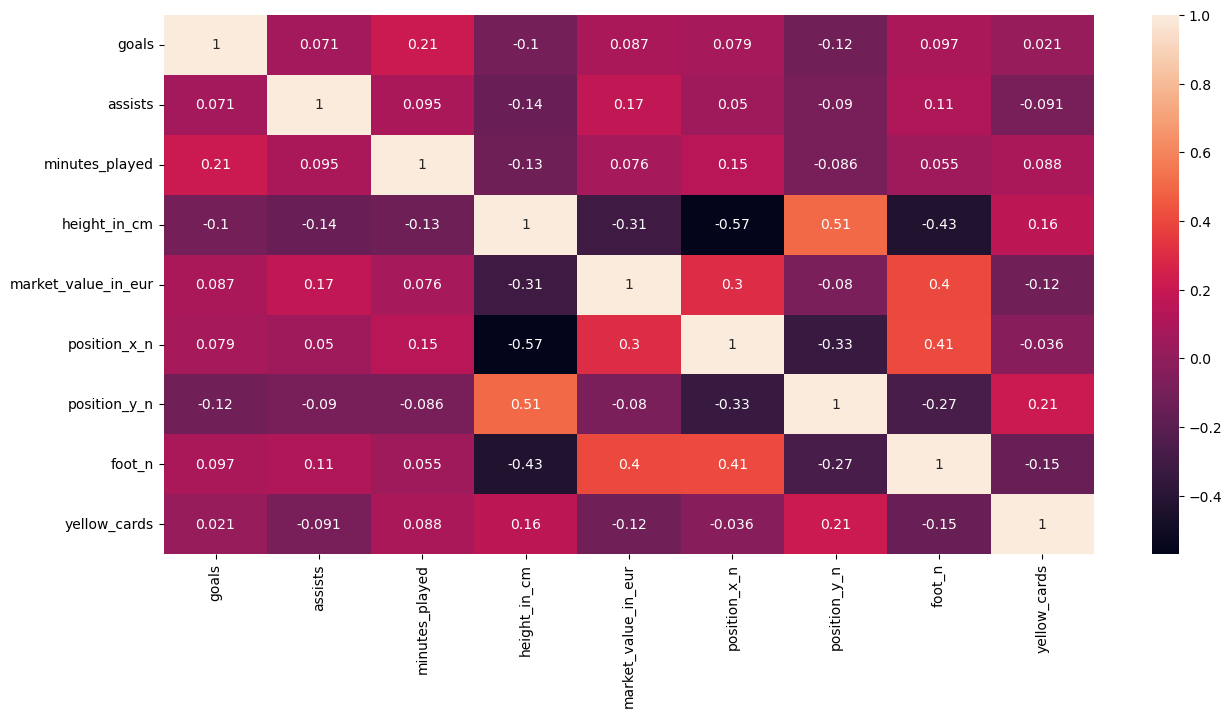

In [113]:
fig,axes = plt.subplots(1,1,figsize=(15,7))
ax = sns.heatmap(new1.corr(),annot=True)
plt.show

In [114]:
sorted_corr = new1.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending = False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
foot_n,0.402838
position_x_n,0.304462
assists,0.173088
goals,0.086918
minutes_played,0.075691
position_y_n,-0.079692
yellow_cards,-0.122324
height_in_cm,-0.311942


## one feature - foot_n

In [115]:
X1 = np.array(new1['foot_n']).reshape(-1,1) #Machine learning models require a 2D input matrix
y = np.array(new1['market_value_in_eur'])

In [116]:
from sklearn.linear_model import LinearRegression

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1,y_train1)

s_r_sq1 = s_model1.score(X_train1,y_train1)
y_pred1 = s_model1.predict(X_test1)

print(s_r_sq1)
print(y_pred1)

0.16463128798398174
[0.18129512 0.18129512 0.18129512 ... 0.18129512 0.18129512 0.18129512]


In [ ]:
X_train1

In [117]:
print('intercept',s_model1.intercept_)
print('slope',s_model1.coef_)

intercept 0.0056201230749556574
slope [0.40667693]


In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [119]:
MSE1 = mean_squared_error(y_test1,y_pred1)
print('MSE:',MSE1)
MAE1 = mean_absolute_error(y_test1,y_pred1)
print('MAE:',MAE1)
RMSE1 = mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE:',RMSE1)
R2_1 = r2_score(y_test1,y_pred1)
print('R2:',R2_1)

MSE: 0.8339883795782813
MAE: 0.8134490213364184
RMSE: 0.9132296423015852
R2: 0.15638553185326498


# INTERPRETATION
- The errors (MSE, MAE, RMSE) are relatively high, indicating poor predictive performance.
- The low R2 (0.15) suggests that the model does not capture much of the variance in the data.
- The model likely needs improvements, such as feature engineering, hyperparameter tuning, or trying a different model.

## two features - foot_n, position_x_n

In [120]:
X2 = np.array(new1[['foot_n','position_x_n']]).reshape(-1,2)
y = np.array(new1['market_value_in_eur'])

In [121]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y,test_size=0.2,random_state=0)
mult_model = LinearRegression().fit(X_train2,y_train2)
y_pred2 = mult_model.predict(X_test2)
print(y_pred2)
print('intercept',mult_model.intercept_)
print('slope',mult_model.coef_)

[-0.02385204  0.28060094  0.28060094 -0.12533636 -0.91611404  0.28060094
 -0.91611404  0.28060094  0.3313431   0.28060094  0.28060094  0.28060094
 -0.02385204  0.22985878  0.28060094 -0.91611404 -0.02385204  0.28060094
 -0.12533636  0.28060094  0.07763229  0.28060094  0.3313431   0.28060094
  0.02689013  0.28060094  0.12837445  0.22985878 -0.91611404 -0.91611404
 -0.5609189  -0.12533636  0.28060094 -0.02385204  0.28060094 -0.91611404
 -0.02385204  0.28060094  0.28060094  0.28060094 -0.91611404  0.28060094
  0.3313431   0.28060094  0.07763229  0.28060094 -0.12533636 -0.91611404
  0.28060094  0.28060094 -0.71314539  0.28060094  0.28060094  0.22985878
 -0.12533636 -0.91611404  0.3313431   0.28060094  0.3313431  -0.17607852
  0.28060094 -0.91611404  0.28060094  0.28060094  0.28060094 -0.02385204
  0.28060094  0.28060094  0.02689013  0.28060094  0.07763229 -0.02385204
  0.28060094  0.22985878 -0.02385204  0.28060094  0.28060094 -0.12533636
 -0.12533636 -0.12533636 -0.91611404  0.28060094  0

In [122]:
MSE2 = mean_squared_error(y_test2,y_pred2)
print('MSE:',MSE2)
MAE2 = mean_absolute_error(y_test2,y_pred2)
print('MAE:',MAE2)
RMSE2 = mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE:',RMSE2)
R2_2 = r2_score(y_test2,y_pred2)
print('R2:',R2_2)

MSE: 0.8424658005303385
MAE: 0.8159442191736487
RMSE: 0.9178593577070174
R2: 0.1705489845283883


# INTERPRETATION:
- The errors (MSE, MAE, RMSE) are relatively high, indicating poor predictive performance.
- The low R2 (0.17) suggests that the model does not capture much of the variance in the data.
- The model likely needs improvements, such as feature engineering, hyperparameter tuning, or trying a different model.

## Three features - foot_n,position_x_n,assists

In [123]:
X3 = np.array(new1[['foot_n','position_x_n','assists']]).reshape(-1,3)
y = np.array(new1['market_value_in_eur'])

In [124]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.2,random_state=0)
mult_model1 = LinearRegression().fit(X_train3,y_train3)
y_pred3 = mult_model1.predict(X_test3)
print(y_pred3)
print('intercept',mult_model1.intercept_)
print('slope',mult_model1.coef_)

[-0.08022732  0.91271278  0.22565488 -0.18218806 -0.93853666  0.22565488
 -0.93853666  0.22565488  0.27663525  0.56918383  0.56918383  0.22565488
 -0.08022732  0.17467451  0.22565488 -0.93853666 -0.08022732  0.22565488
 -0.18218806  0.22565488  0.02173341  0.22565488  0.27663525  0.22565488
 -0.02924696  0.22565488  0.07271378  0.17467451 -0.93853666 -0.93853666
 -0.58167408 -0.18218806  0.22565488 -0.08022732  0.22565488 -0.93853666
  0.26330163  0.56918383  0.22565488  0.22565488 -0.93853666  0.22565488
  0.27663525  0.22565488  0.02173341  0.22565488 -0.18218806 -0.93853666
  0.56918383  0.56918383 -0.73461519  0.22565488  0.22565488  0.17467451
 -0.18218806 -0.93853666  0.27663525  0.22565488  0.27663525 -0.23316842
  0.22565488 -0.93853666  0.22565488  0.22565488  0.22565488 -0.08022732
  0.22565488  0.22565488 -0.02924696  0.22565488  0.02173341 -0.08022732
  0.22565488  0.17467451 -0.08022732  0.22565488  0.22565488 -0.18218806
 -0.18218806 -0.18218806 -0.93853666  0.22565488  0

In [125]:
MSE3 = mean_squared_error(y_test3,y_pred3)
print('MSE:',MSE3)
MAE3 = mean_absolute_error(y_test3,y_pred3)
print('MAE:',MAE3)
RMSE3 = mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE:',RMSE3)
R2_3 = r2_score(y_test3,y_pred3)
print('R2:',R2_3)

MSE: 0.8222891994626924
MAE: 0.8044491909466767
RMSE: 0.9068016318151906
R2: 0.1904138885206803


# INTERPRETATION:
- The errors (MSE, MAE, RMSE) are relatively high, indicating poor predictive performance.
- The low R2 (0.19) suggests that the model does not capture much of the variance in the data.
- The model likely needs improvements, such as feature engineering, hyperparameter tuning, or trying a different model.

## Four features - 'foot_n','position_x_n','assists','minutes_played'

In [126]:
X4 = np.array(new1[['foot_n','position_x_n','assists','minutes_played']]).reshape(-1,4)
y = np.array(new1['market_value_in_eur'])

In [127]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y,test_size=0.2,random_state=0)
mult_model2 = LinearRegression().fit(X_train4,y_train4)
y_pred4 = mult_model2.predict(X_test4)
print('intercept',mult_model2.intercept_)
print('slope',mult_model2.coef_)

intercept -0.000513407234305486
slope [0.32681767 0.16146552 0.12621896 0.02152781]


In [128]:
MSE4 = mean_squared_error(y_test4,y_pred4)
print('MSE:',MSE4)
MAE4 = mean_absolute_error(y_test4,y_pred4)
print('MAE:',MAE4)
RMSE4 = mean_squared_error(y_test4,y_pred4,squared=False)
print('RMSE:',RMSE4)
R2_4 = r2_score(y_test4,y_pred4)
print('R2:',R2_4)

MSE: 0.8217958679029026
MAE: 0.8032295493085719
RMSE: 0.9065295736504698
R2: 0.19089959887589503


In [129]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual':label,'Predicted':predictions})
    df_results['Residuals'] = abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results

In [130]:
def homoscedasticity_assumption(model,features,label):
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')

    df_results = calculate_residuals(model,features,label)
    print(df_results)

    plt.subplots(figsize=(8,6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="darkorange",linestyle = "--")
    plt.title("residual plot")
    plt.xlabel("index")
    plt.ylabel("residual")
    plt.show()

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
       Actual  Predicted  Residuals
0   -0.423597  -0.116184   0.307413
1    1.237435   0.922383   0.315052
2    1.237435   0.217837   1.019598
3    0.776038  -0.155732   0.620306
4   -0.884995  -0.914306  -0.029311
..        ...        ...        ...
723 -0.423597  -0.082339   0.341258
724  1.237435   0.219888   1.017547
725 -1.041870   0.009515   1.032355
726  0.222360   0.123707   0.098653
727  0.222360   0.128835   0.093525

[728 rows x 3 columns]


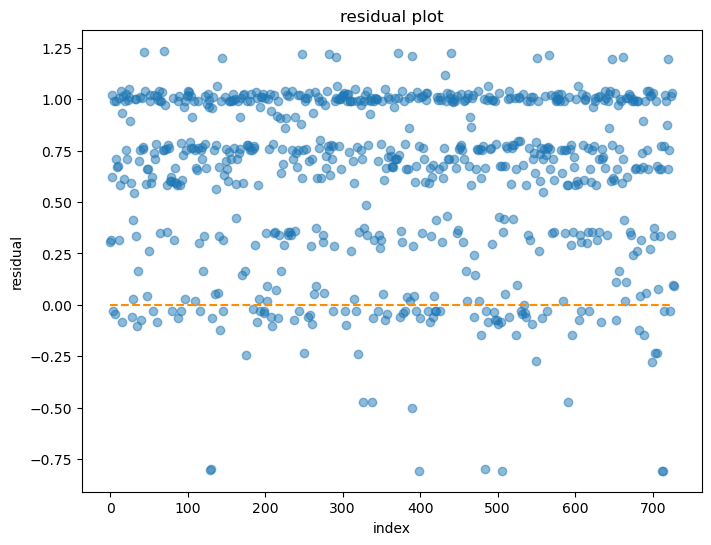

In [131]:
homoscedasticity_assumption(mult_model2,X_test4,y_test4)

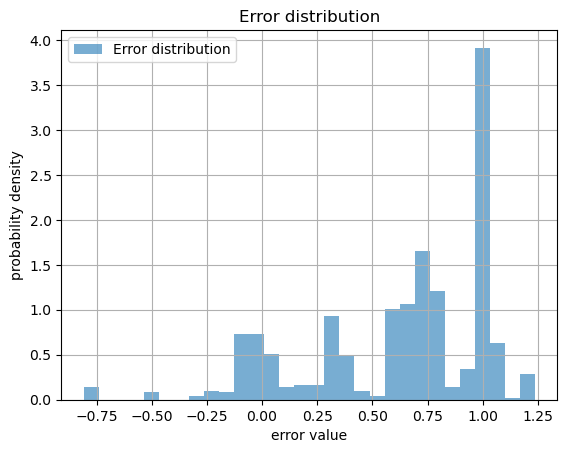

In [132]:
# Error Normality curve
df_results = calculate_residuals(mult_model2,X_test4,y_test4)
plt.hist(df_results.Residuals,bins=30,label="Error distribution",alpha=0.6,density=True)
plt.xlabel("error value")
plt.ylabel('probability density')
plt.title('Error distribution')
plt.grid(True)
plt.legend()
plt.show()

### INTERPRETATION:
- The four multilinear regression models show similar performance in predicting football player market value, with Model 3 and 4 slightly edging out the others with a marginally higher R-squared of 0.19 and correspondingly lower error metrics, suggesting they explain a tiny bit more of the variance in market value, though overall, the models only explain a very small portion of the variance and have high errors.
- The residual and error distribution plots (for Model 1 only) suggest potential issues with the model's assumptions, which could be contributing to the low R-squared values and high errors.

# 3. Team Comparison

### - Descriptive analysis and visualization

In [ ]:
df.columns

In [133]:
req = [['home_club_name', 'goals', 'home_club_goals', 'away_club_goals', 'season', 'yellow_cards', 'red_cards']]

### 1) Which team has the highest average goals per match over the seasons?


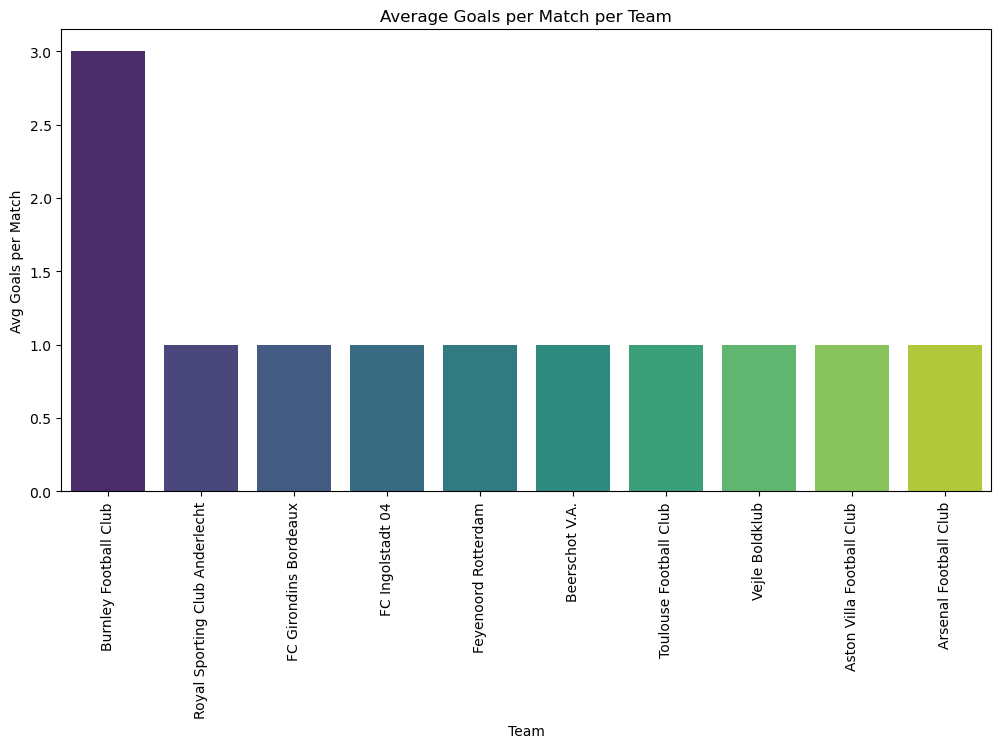

In [134]:
goals_per_team = df.groupby('home_club_name')['goals'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=goals_per_team.index, y=goals_per_team.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Average Goals per Match per Team")
plt.ylabel("Avg Goals per Match")
plt.xlabel("Team")
plt.show()

### 2) How do different teams compare in terms of disciplinary records (yellow & red cards)?


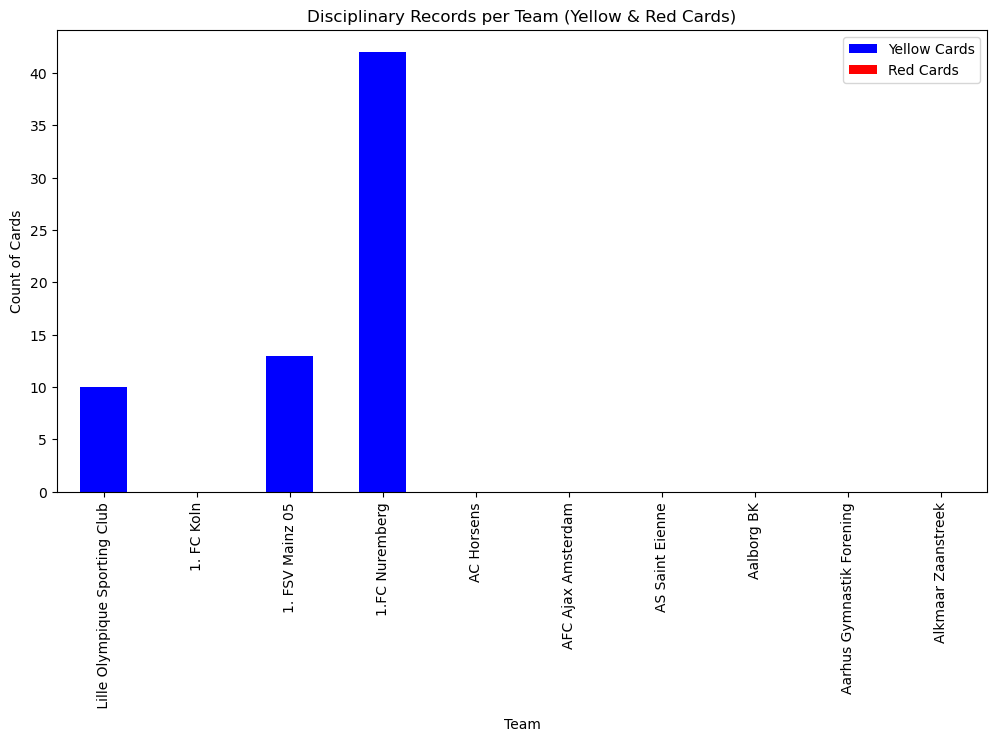

In [135]:
disciplinary = df.groupby('home_club_name')[['yellow_cards', 'red_cards']].sum().head(10)
ax = disciplinary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])
plt.title("Disciplinary Records per Team (Yellow & Red Cards)")
plt.ylabel("Count of Cards")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.legend(["Yellow Cards", "Red Cards"])
plt.show()

### - Hypothesis testing

### Is there a significant difference between the number of goals scored by home teams and away teams?


HYPOTHESIS
- H0: There is no significant difference between the number of goals scored by home teams and away teams
- H1: There is significant difference between the Number of goals score by home teams and away teams
- it is a two tailed test

In [136]:
hypothesis_data1=df.loc[:,["home_club_goals"]]
hypothesis_data1
sample_data1=hypothesis_data1.sample(n=30,replace=True,random_state=1)

In [137]:
p1_mean=st.mean(hypothesis_data1["home_club_goals"])
p1_std=st.stdev(hypothesis_data1["home_club_goals"])
p1_variance=st.variance(hypothesis_data1["home_club_goals"])
s1_mean=st.mean(sample_data1['home_club_goals'])
s1_std=st.stdev(sample_data1['home_club_goals'])
s1_variance=st.variance(sample_data1["home_club_goals"])

In [138]:
hypothesis_data2=df.loc[:,["away_club_goals"]]
sample_data2=hypothesis_data2.sample(n=30,replace=True,random_state=1)
p2_mean=st.mean(hypothesis_data2["away_club_goals"])
p2_std=st.stdev(hypothesis_data2["away_club_goals"])
p2_variance=st.variance(hypothesis_data2["away_club_goals"])
s2_mean=st.mean(hypothesis_data2["away_club_goals"])
s2_std=st.stdev(hypothesis_data2["away_club_goals"])
s2_variance=st.variance(hypothesis_data2["away_club_goals"])
n1=len(sample_data1)
n2=len(sample_data2)
dof=n1+n2-2
dof

58

In [139]:
x1=s1_mean
x2=s2_mean
v1=s1_variance
v2=s2_variance
p1=p1_mean
p2=p2_mean
alpha=0.05

In [140]:
from scipy.stats import norm,t

In [141]:
signal=abs(x1-x2)
noise=m.sqrt((v1*(n1-1+(v2*(n2-2)))*((1/n1+1/n2))))
t_statistics=signal/noise
print("The t_statistics values are:",t_statistics)
p_value=t.sf(abs(t_statistics),dof)
print("The p_values are:",p_value)
t_critical=norm.ppf(alpha/2,dof)
print("The t_critical values are:",t_critical)

The t_statistics values are: 0.036753899240345236
The p_values are: 0.4854037206592319
The t_critical values are: 56.04003601545995


p_value = 0.48 > alpha = 0.05 : which leads to the acceptance of null hypothesis
t_statistics = 0.036 < t_critical = 56.0 : which leads to the acceptance of null hypothesis

# 4. Attendance and Stadium Analysis:

### - Descriptive analysis and visualization

### 1) What is the trend of attendance over seasons?


In [142]:
df['season'] = df['season'].astype(str)  
seasonal_attendance = df.groupby('season')['attendance'].mean().reset_index()

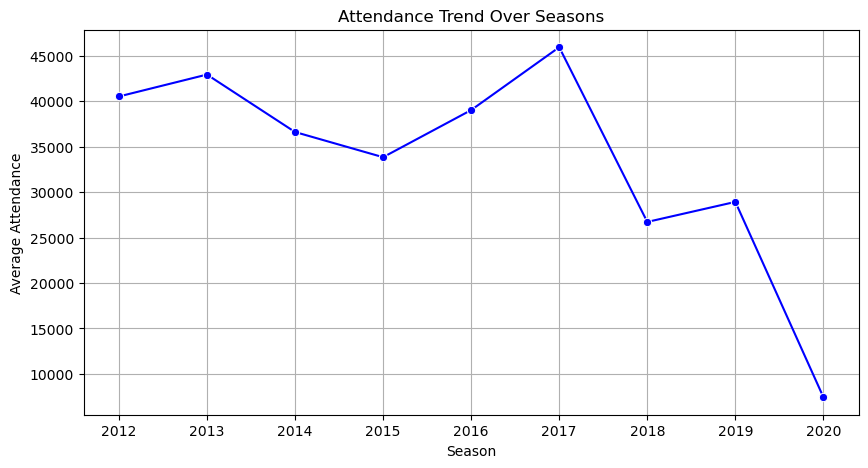

In [143]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonal_attendance, x='season', y='attendance', marker="o",color="b")
plt.title("Attendance Trend Over Seasons")
plt.ylabel("Average Attendance")
plt.xlabel("Season")
plt.grid()
plt.show()

### INTERPRETATION:
- Attendance fluctuated over the seasons, peaking in 2017 before sharply declining to its lowest point in 2020.

### 2) Which teams have the highest home game attendance?


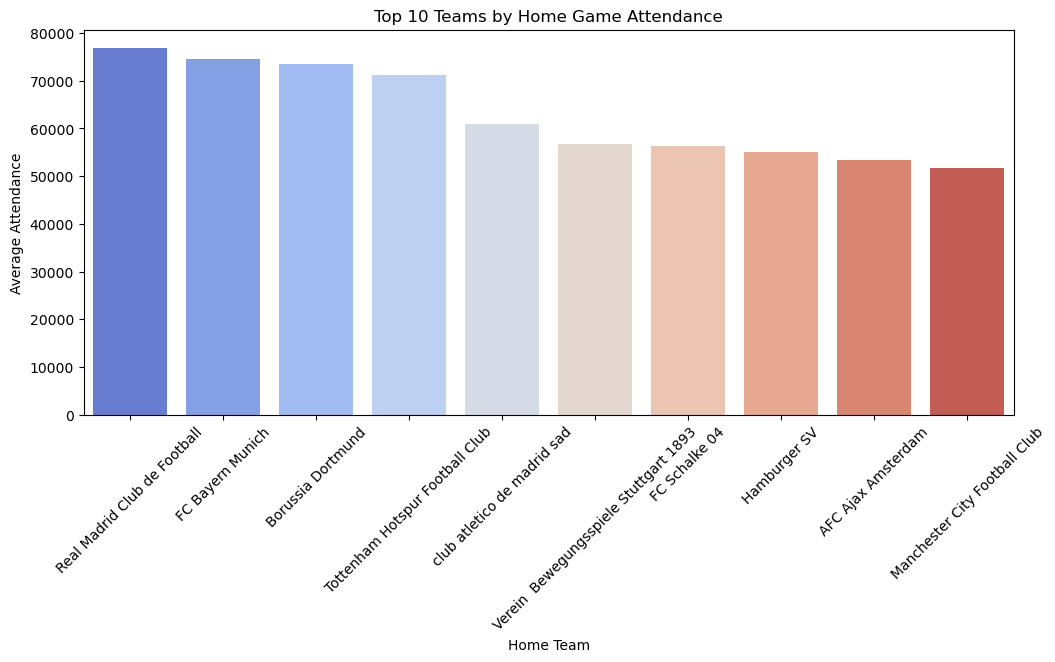

In [144]:
home_team_attendance = df.groupby('home_club_name')['attendance'].mean().reset_index()
home_team_attendance = home_team_attendance.sort_values(by='attendance', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(data=home_team_attendance.head(10), x='home_club_name', y='attendance', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Teams by Home Game Attendance")
plt.ylabel("Average Attendance")
plt.xlabel("Home Team")
plt.show()

### INTERPRETATION:
- Real Madrid leads home game attendance, followed by a gradual decrease across the remaining top 10 teams.

### KNN Classification

### categorize matches into high moderate low attendance based on match characteristics and other significant factors-knn

In [145]:
att_df = df.copy()
att_df["attendance_category"] = 0  # Low
att_df.loc[(att_df["attendance"] >= 17000) & (att_df["attendance"] < 41000), "attendance_category"] = 1  # Moderate
att_df.loc[att_df["attendance"] >= 41000, "attendance_category"] = 2  # High
att_df.head()

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,goal_contributions,attendance_category
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN,0,2
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN,0,2
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN,0,2
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN,0,2
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN,0,2


In [146]:
att_df["attendance_category"]

0       2
1       2
2       2
3       2
4       2
       ..
3632    0
3633    0
3634    0
3635    0
3636    0
Name: attendance_category, Length: 3637, dtype: int64

In [147]:
test_data1 = test_data.copy()
test_data1["attendance_category"] = 0  # Default Low
test_data1.loc[(test_data1["attendance"] >= 17000) & (test_data1["attendance"] < 41000), "attendance_category"] = 1  # Moderate
test_data1.loc[test_data1["attendance"] >= 41000, "attendance_category"] = 2  # High
test_data1.head()

,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,...,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y,attendance_category
0,3450613_315762,3450613,315762,NL1,0,0,0,0,58,2020,...,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield,0
1,3450613_315762,3450613,315762,NL1,0,0,0,0,58,2020,...,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield,0


In [148]:
test_data1[['attendance_category']]

,attendance_category
0,0
1,0


In [149]:
knn_features_df = att_df.loc[:, ["goals", "minutes_played", "season", "competition_type", "yellow_cards", "attendance_category"]]
knn_features_df

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,70,2012,domestic_league,0,2
1,0,70,2012,domestic_league,0,2
2,0,70,2012,domestic_league,0,2
3,0,70,2012,domestic_league,0,2
4,0,70,2012,domestic_league,0,2
...,...,...,...,...,...,...
3632,1,77,2020,domestic_league,0,0
3633,1,77,2020,domestic_league,0,0
3634,1,77,2020,domestic_league,0,0
3635,1,77,2020,domestic_league,0,0


In [150]:
knn_features_test = test_data1.loc[:, ["goals", "minutes_played", "season", "competition_type", "yellow_cards", "attendance_category"]]
knn_features_test

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,58,2020,domestic_league,0,0
1,0,58,2020,domestic_league,0,0


In [151]:
knn_combined = pd.concat([knn_features_test, knn_features_df], ignore_index=True)
knn_combined

,goals,minutes_played,season,competition_type,yellow_cards,attendance_category
0,0,58,2020,domestic_league,0,0
1,0,58,2020,domestic_league,0,0
2,0,70,2012,domestic_league,0,2
3,0,70,2012,domestic_league,0,2
4,0,70,2012,domestic_league,0,2
...,...,...,...,...,...,...
3634,1,77,2020,domestic_league,0,0
3635,1,77,2020,domestic_league,0,0
3636,1,77,2020,domestic_league,0,0
3637,1,77,2020,domestic_league,0,0


In [152]:
label_encoder=preprocessing.LabelEncoder()
knn_combined["competition_type_enc"] = label_encoder.fit_transform(knn_combined["competition_type"])

In [153]:
knn_combined = knn_combined.drop(["competition_type"],axis=1)

In [ ]:
knn_combined

In [154]:
attendence = knn_combined.loc[:,["attendance_category"]]
attendence

,attendance_category
0,0
1,0
2,2
3,2
4,2
...,...
3634,0
3635,0
3636,0
3637,0


In [155]:
knn_combined = knn_combined.drop(["attendance_category"],axis=1)

In [156]:
cols = knn_combined.columns
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(knn_combined)
df_scaled2 = pd.DataFrame(df_scaled2,columns = cols)

In [157]:
df_scaled2 = pd.concat([df_scaled2,attendence],axis=1)
df_scaled2

,goals,minutes_played,season,yellow_cards,competition_type_enc,attendance_category
0,-0.787558,-0.571927,1.438251,-0.42737,-0.014361,0
1,-0.787558,-0.571927,1.438251,-0.42737,-0.014361,0
2,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
3,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
4,-0.787558,-0.000131,-2.991069,-0.42737,-0.014361,2
...,...,...,...,...,...,...
3634,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3635,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3636,0.845446,0.333417,1.438251,-0.42737,-0.014361,0
3637,0.845446,0.333417,1.438251,-0.42737,-0.014361,0


In [158]:
k_train,k_test = train_test_split(df_scaled2,test_size=0.3,random_state=0,shuffle=True)

In [159]:
X_train_a = np.array(k_train.drop(["attendance_category"],axis = 1))
X_test_a = np.array(k_test.drop(["attendance_category"],axis = 1))
y_train_a = np.array(k_train["attendance_category"])
y_test_a = np.array(k_test["attendance_category"])

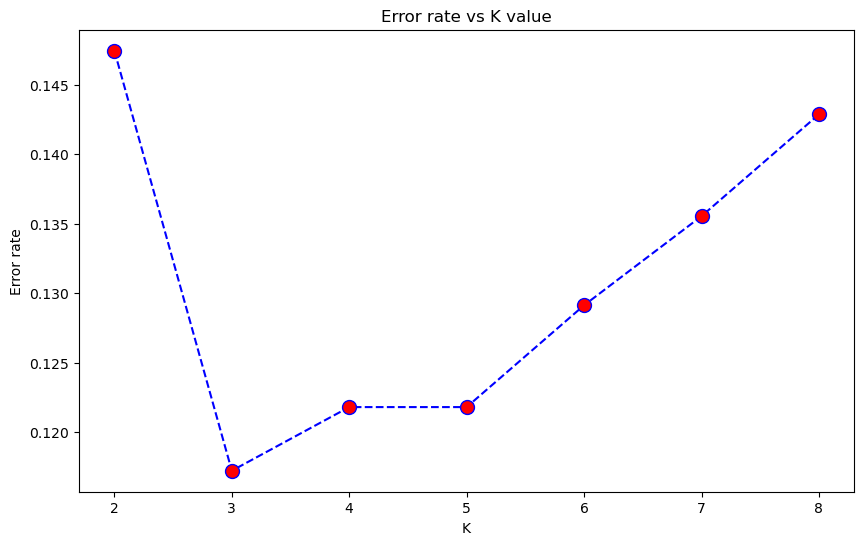

In [160]:
from sklearn import neighbors
error_rate = []
for i in range(2,9):
    att_model = neighbors.KNeighborsClassifier(n_neighbors = i)
    att_model.fit(X_train_a,y_train_a)
    pred_i = att_model.predict(X_test_a)
    error_rate.append(np.mean(pred_i != y_test_a))
plt.figure(figsize=(10,6))
plt.plot(range(2,9),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [162]:
k = 3

In [163]:
att_model = neighbors.KNeighborsClassifier(n_neighbors = k)
model = att_model.fit(X_train_a,y_train_a)
predict = model.predict(X_test_a)

In [164]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Accuracy score',accuracy_score(predict,y_test_a))
print('Recall score',recall_score(predict,y_test_a,average='micro'))
print('F1 score',f1_score(predict,y_test_a,average='micro'))
print('Precision score',precision_score(predict,y_test_a,average='micro'))

Accuracy score 0.8827838827838828
Recall score 0.8827838827838828
F1 score 0.8827838827838828
Precision score 0.8827838827838828


In [165]:
from sklearn.metrics import roc_auc_score
predict_prob = att_model.predict_proba(X_test_a)
roc = roc_auc_score(y_test_a,predict_prob,multi_class='ovr',average='macro')
print(roc)

0.9439489851771019


### INTERPRETATION:
- OVERALL: all scores(accuracy,recall,precision,f1score and roc auc)are relatively high(around 0.8)suggests that the model perform well in both identifying relevant cases (Recall) and making accurately positive predictions(precision)
- this indicates a balanced classification where the model is neither over predicting nor under predicting the positive class
a score of 0.8 on a classification model translates to approx 80% accuracy which indicates good performance and suggests a promissing classification model

# PART-8

# 5. Referee Analysis

### - Descriptive analysis and visualization

### 1) Referees with Most Matches Officiated

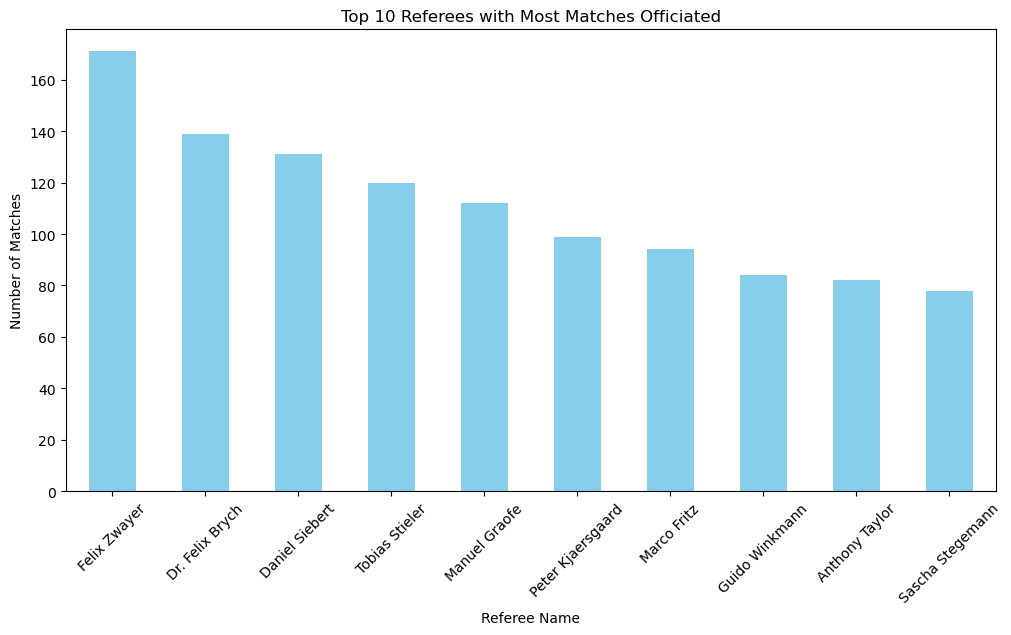

In [166]:
referee_counts = df["referee"].value_counts().head(10)
plt.figure(figsize=(12,6))
referee_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Referee Name")
plt.ylabel("Number of Matches")
plt.title("Top 10 Referees with Most Matches Officiated")
plt.xticks(rotation=45)
plt.show()

### INTERPRETATION:
- Felix Zwayer is the referee who is associated with more number of matches

### 2) What is the average number of yellow and red cards given per referee?


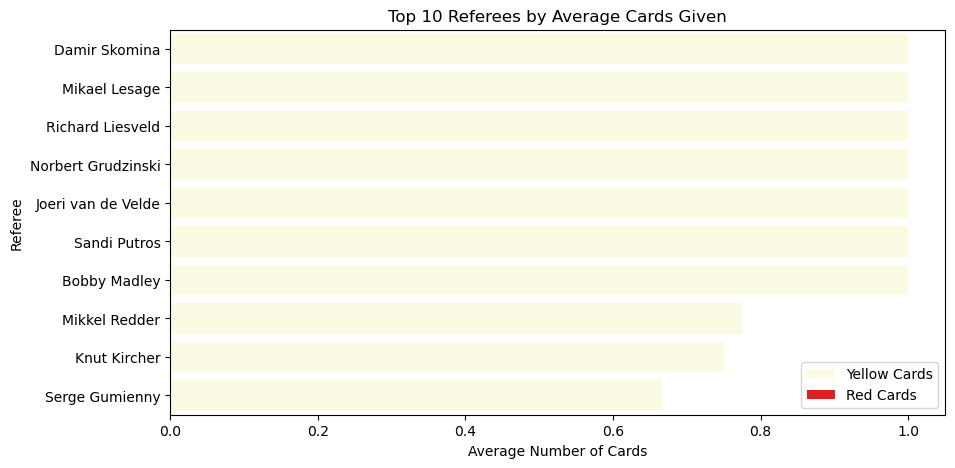

In [167]:
referee_cards = df.groupby("referee")[["yellow_cards", "red_cards"]].mean().reset_index()

referee_cards_sorted = referee_cards.sort_values("yellow_cards", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=referee_cards_sorted, x="yellow_cards", y="referee", color="lightyellow", label="Yellow Cards")
sns.barplot(data=referee_cards_sorted, x="red_cards", y="referee", color="red", label="Red Cards")
plt.legend()
plt.xlabel("Average Number of Cards")
plt.ylabel("Referee")
plt.title("Top 10 Referees by Average Cards Given")
plt.show()

### 3) Referee’s Influence on Match Goals


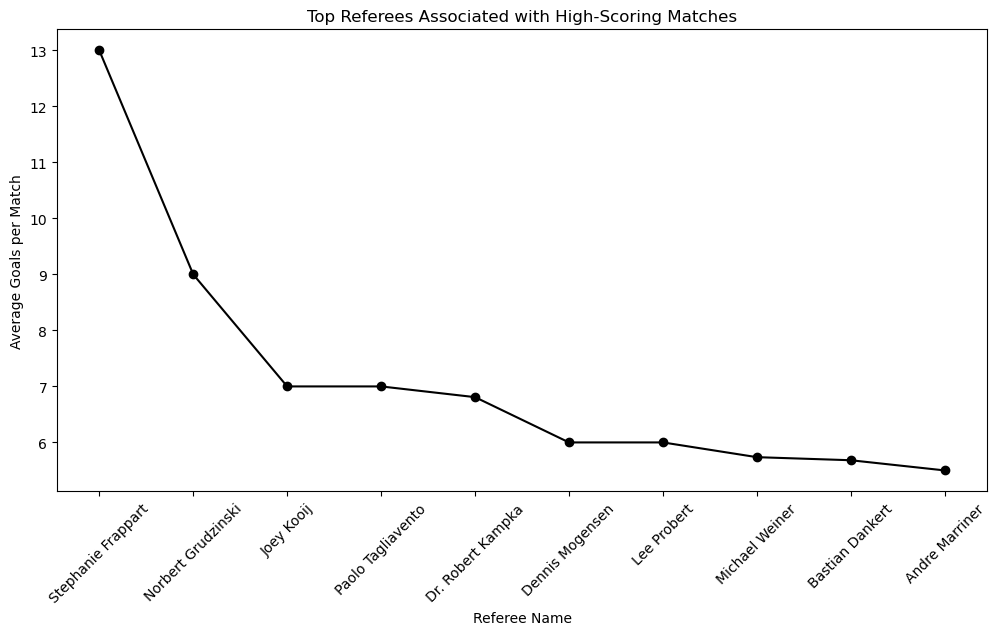

In [168]:
df["total_goals"] = df["home_club_goals"] + df["away_club_goals"]
referee_goals = df.groupby("referee")["total_goals"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.plot(referee_goals.index, referee_goals.values, color="black",marker='o')
plt.xlabel("Referee Name")
plt.ylabel("Average Goals per Match")
plt.title("Top Referees Associated with High-Scoring Matches")
plt.xticks(rotation=45)
plt.show()

# 6. Substitution patterns

### - Descriptive analysis and visualization

### 1) Teams with Most Substitutions per Match


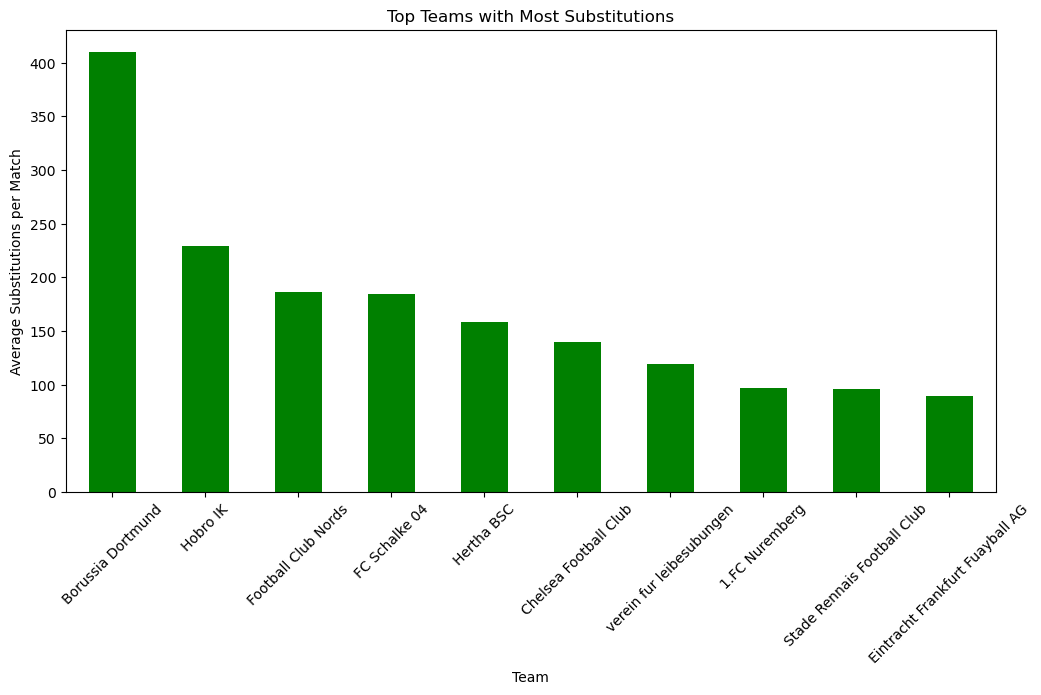

In [169]:
team_substitutions = df.groupby("home_club_name")["game_event_id"].count().sort_values(ascending=False).head(10)

team_substitutions.plot(kind="bar", figsize=(12,6), color="green")
plt.xlabel("Team")
plt.ylabel("Average Substitutions per Match")
plt.title("Top Teams with Most Substitutions")
plt.xticks(rotation=45)
plt.show()

### 2) Most Common Substitution Minutes


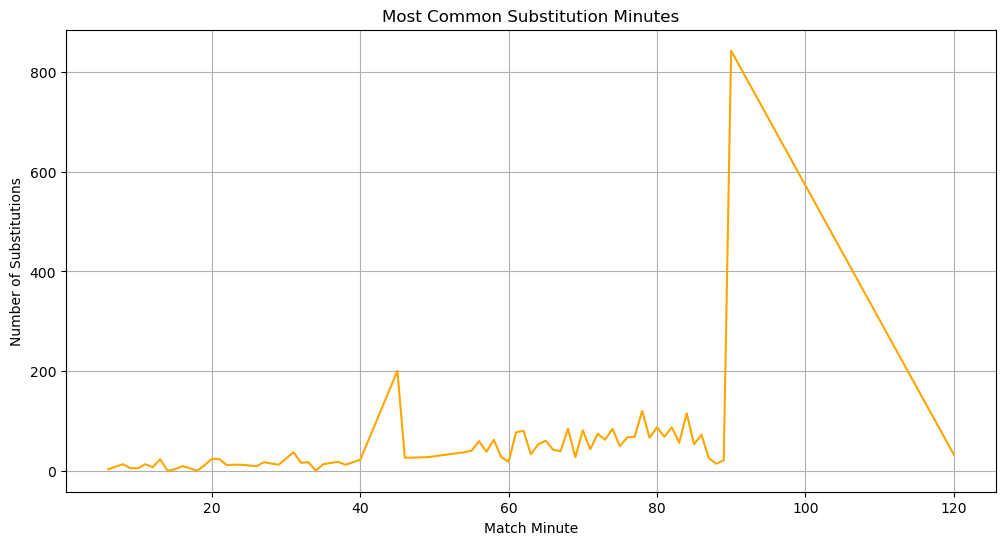

In [170]:
sub_minute_counts = df["minutes_played"].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(sub_minute_counts.index, sub_minute_counts.values, color="orange")
plt.xlabel("Match Minute")
plt.ylabel("Number of Substitutions")
plt.title("Most Common Substitution Minutes")
plt.grid()
plt.show()

### 3) Substitutions & Win Percentage


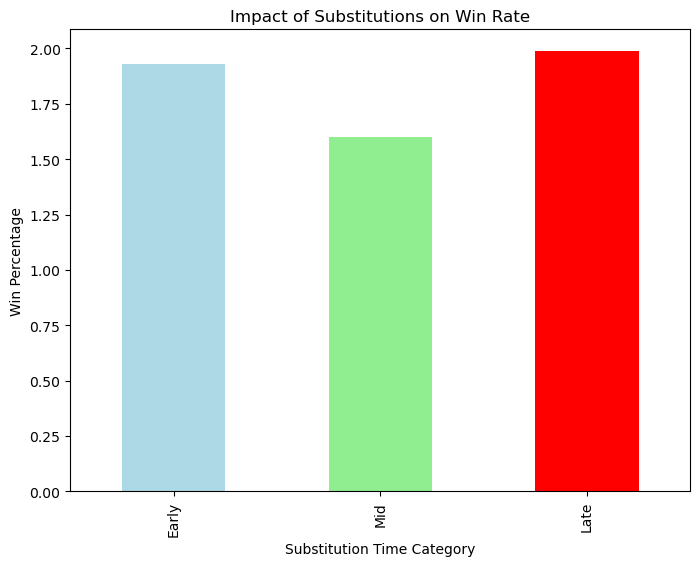

In [171]:
df["sub_category"] = pd.cut(df["minutes_played"], bins=[0, 30, 60, 90], labels=["Early", "Mid", "Late"])

win_rate = df.groupby("sub_category")["home_club_goals"].mean()

win_rate.plot(kind="bar", figsize=(8,6), color=["lightblue", "lightgreen", "red"])
plt.xlabel("Substitution Time Category")
plt.ylabel("Win Percentage")
plt.title("Impact of Substitutions on Win Rate")
plt.show()

# 7. Event Analysis

### - Descriptive analysis and visualization

### 1) Most Common Match Events


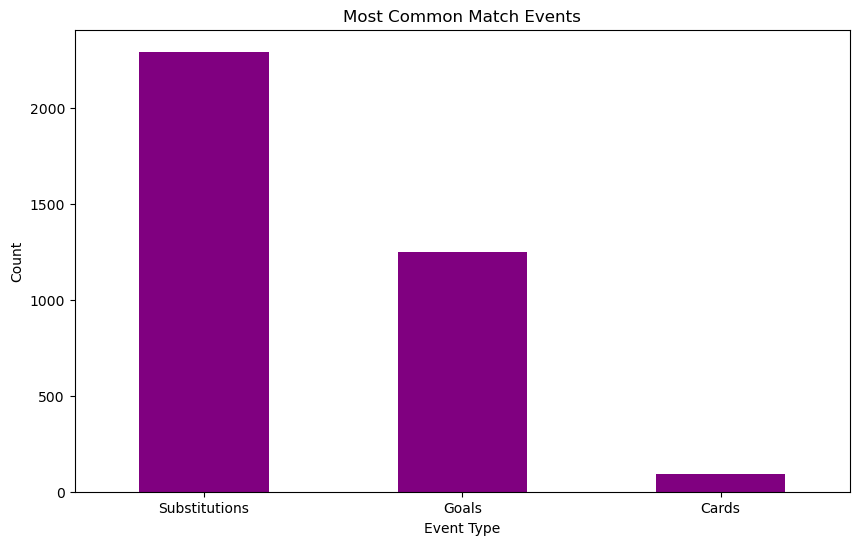

In [172]:
event_counts = df["type_x"].value_counts().head(10)

event_counts.plot(kind="bar", figsize=(10,6), color="purple")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Most Common Match Events")
plt.xticks(rotation=0)
plt.show()

### 2) Event Distribution Across competition


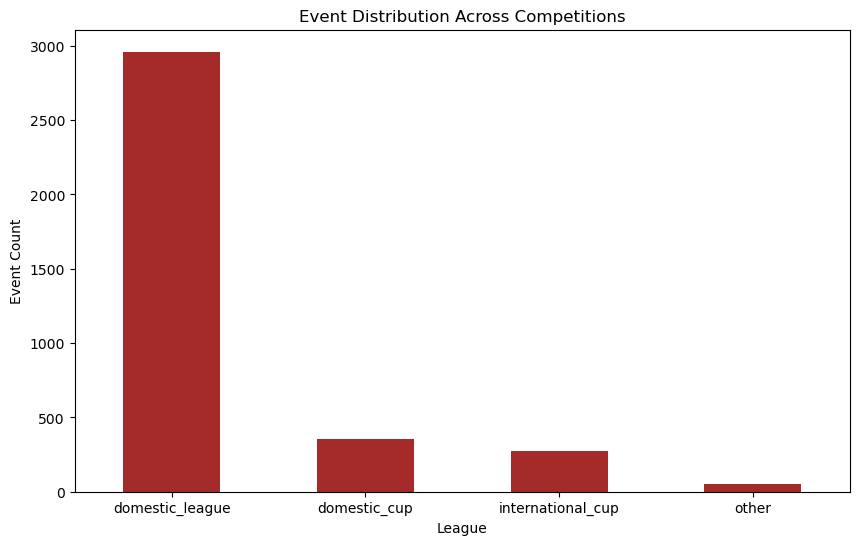

In [173]:
league_events = df.groupby("competition_type")["type_x"].count().sort_values(ascending=False)

league_events.plot(kind="bar", figsize=(10,6), color="brown")
plt.xlabel("League")
plt.ylabel("Event Count")
plt.title("Event Distribution Across Competitions")
plt.xticks(rotation=0)
plt.show()

# PART-9

### - Hypothesis testing

### Is there a significant diff in the avg number of goals scored by players of diff preferred foot(left or right),select 35 random samples of the avg number of goals scored by the players from the given dataand use the 5% sig level for the test

- Null Hypothesis (h0): There is no significant difference in the mean number of goals scored by left-footed and right-footed players. 
- Alternative Hypothesis (h1): There is a significant difference in the mean number of goals scored by left-footed and right-footed players. 

In [174]:
left_foot_players = df[df["foot"] == "left"]
goals_left_foot = left_foot_players[["goals"]]

pop_left_mean = st.mean(goals_left_foot["goals"])
pop_left_std = st.stdev(goals_left_foot["goals"])
pop_left_variance = st.variance(goals_left_foot["goals"])

sample_goals_left = goals_left_foot.sample(n=35, replace=True, random_state=1)

sample_left_mean = st.mean(sample_goals_left["goals"])
sample_left_std = st.stdev(sample_goals_left["goals"])
sample_left_variance = st.variance(sample_goals_left["goals"])

In [175]:
right_foot_players = df[df["foot"] == "right"]
goals_right_foot = right_foot_players[["goals"]]

pop_right_mean = st.mean(goals_right_foot["goals"])
pop_right_std = st.stdev(goals_right_foot["goals"])
pop_right_variance = st.variance(goals_right_foot["goals"])

sample_goals_right = goals_right_foot.sample(n=35, replace=True, random_state=1)

sample_right_mean = st.mean(sample_goals_right["goals"])
sample_right_std = st.stdev(sample_goals_right["goals"])
sample_right_variance = st.variance(sample_goals_right["goals"])

In [176]:
n1 = len(sample_goals_left)
n2 = len(sample_goals_right)
alpha = 0.05

In [177]:
# z-test
z_statistic = ((sample_left_mean - sample_right_mean)-(pop_left_mean - pop_right_mean)) /(m.sqrt(sample_left_variance/n1 + sample_right_variance/n2))
print('z_statistic is:',z_statistic)
p_value = norm.sf(abs(z_statistic))*2
print('p_value is:',p_value)
z_critical = norm.ppf(alpha/2)
print('z_critical is:',z_critical)

z_statistic is: 0.826542567682871
p_value is: 0.4084963813201512
z_critical is: -1.9599639845400545


If the calculated Z-statistic is greater than the Z-critical value or if the p-value is less than the significance level (alpha), you can reject the null hypothesis.
1.  Z-statistic > Z-critical or
2.   pvalue > alpha

So, from the above analysis:
p-value = 0.40 and alpha = 0.05 : pvalue > alpha : accept the Null Hypothesis
z-statistics = 0.82 , Z-critical = -1.95 : Z-statitics > Z-critical : accept the Null Hypothesis

# 8. Competition Analysis

### - Descriptive analysis and visualization

### 1) Which competitions have the highest average attendance?


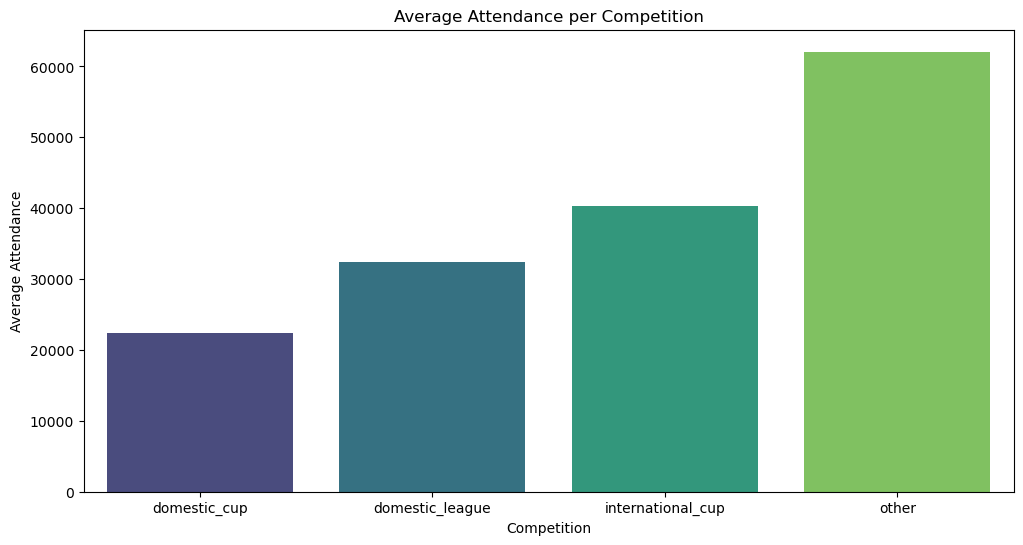

In [178]:
if isinstance(df, pd.DataFrame) and "competition_type" in df.columns and "attendance" in df.columns:
    attendance_per_competition = df.groupby("competition_type")["attendance"].mean().sort_values()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=attendance_per_competition.index, y=attendance_per_competition.values, palette="viridis")
    plt.xticks(rotation=0)
    plt.xlabel("Competition")
    plt.ylabel("Average Attendance")
    plt.title("Average Attendance per Competition")
    plt.show()
else:
    print("Required columns missing in dataset")

### 2) How do goal-scoring trends vary across different competitions?


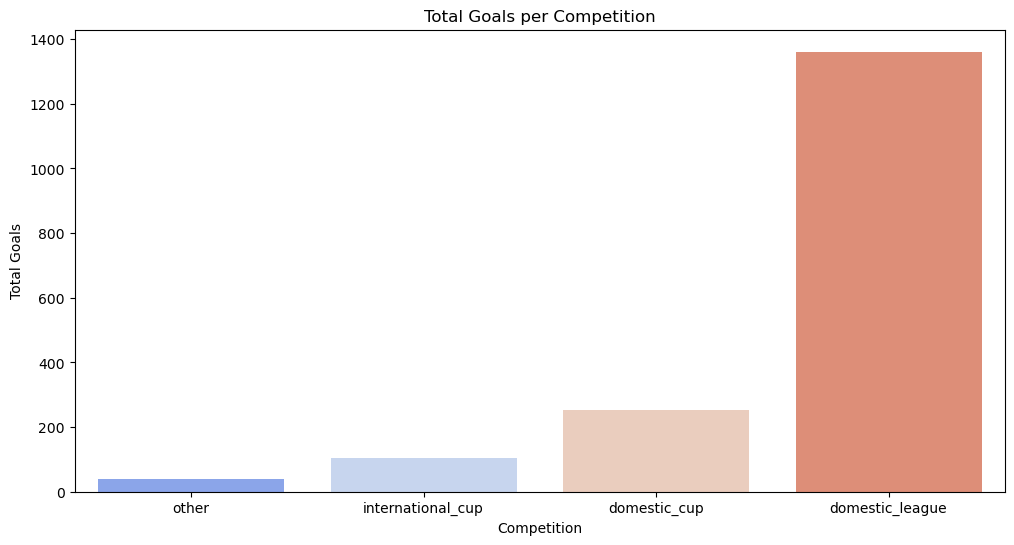

In [179]:
goals_per_competition = df.groupby("competition_type")["goals"].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=goals_per_competition.index, y=goals_per_competition.values, palette="coolwarm")
plt.xticks(rotation=0)
plt.xlabel("Competition")
plt.ylabel("Total Goals")
plt.title("Total Goals per Competition")
plt.show()

### 3) Which competition has the highest average match intensity (based on goals, cards, and substitutions)?


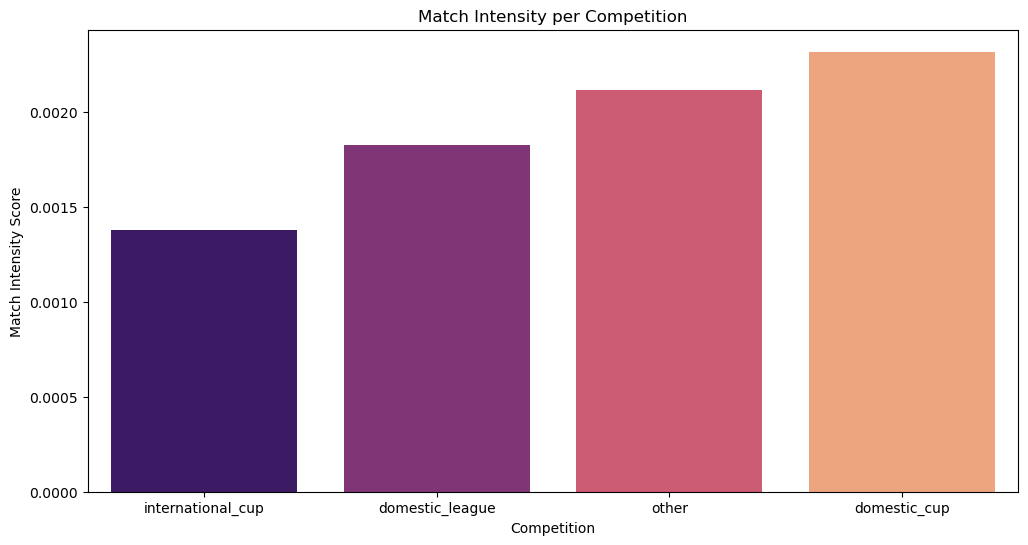

In [180]:
df["match_intensity"] = (df["goals"] + df["yellow_cards"] + df["red_cards"]) / df["game_id_x"].nunique()
intensity_per_competition = df.groupby("competition_type")["match_intensity"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=intensity_per_competition.index, y=intensity_per_competition.values, palette="magma")
plt.xticks(rotation=0)
plt.xlabel("Competition")
plt.ylabel("Match Intensity Score")
plt.title("Match Intensity per Competition")
plt.show()

# PART-10

# 9. Player Attributes and Demographics:

### - Descriptive analysis and Visualization

### 1)  How does player height vary across different playing positions?


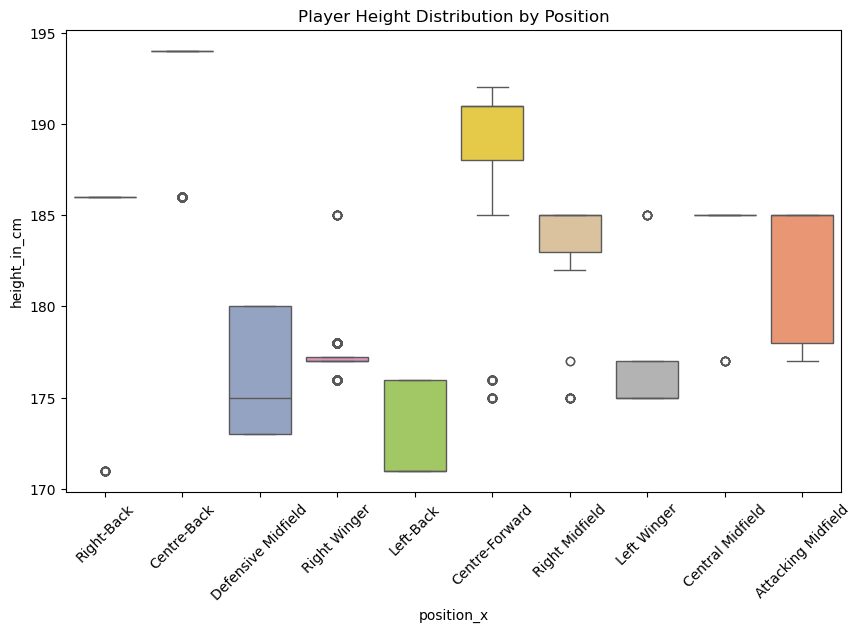

In [181]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='position_x', y='height_in_cm', data=df, palette='Set2')
plt.title("Player Height Distribution by Position")
plt.xticks(rotation=45)
plt.show()

### 2) Is there a correlation between a player's country of birth and their preferred foot?


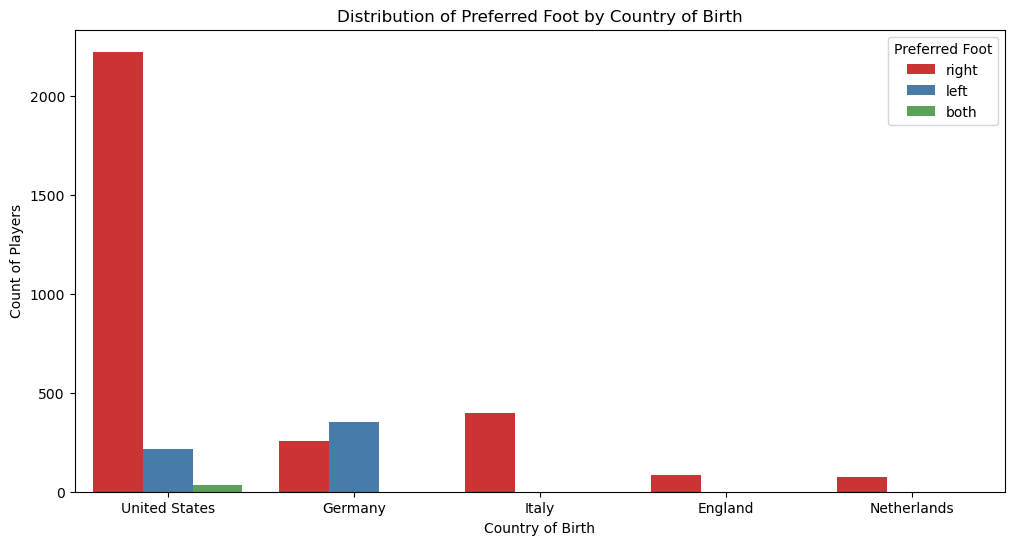

In [182]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country_of_birth', hue='foot', data=df, palette='Set1', order=df['country_of_birth'].value_counts().index)
plt.xticks(rotation=0)
plt.xlabel("Country of Birth")
plt.ylabel("Count of Players")
plt.title("Distribution of Preferred Foot by Country of Birth")
plt.legend(title="Preferred Foot")
plt.show()

### 3) What is the nationality distribution of players?


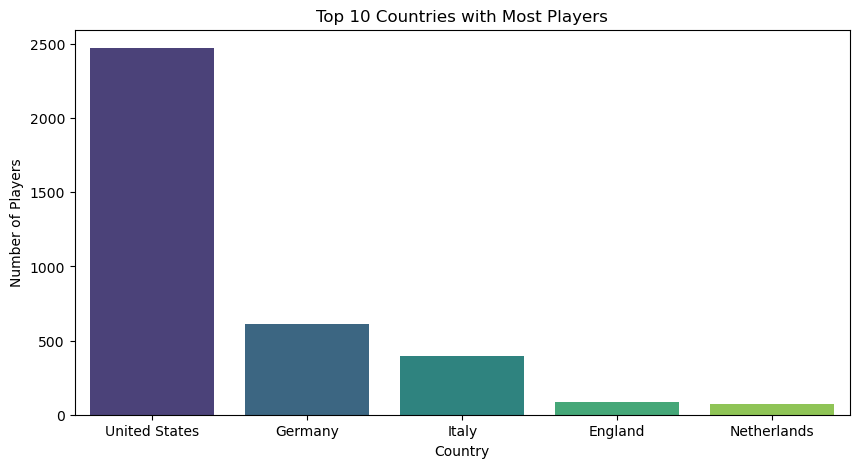

In [183]:
top_countries = df['country_of_birth'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries with Most Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=0)
plt.show()

### 4) Is there a correlation between player attributes (e.g., stamina, speed) and performance rating?


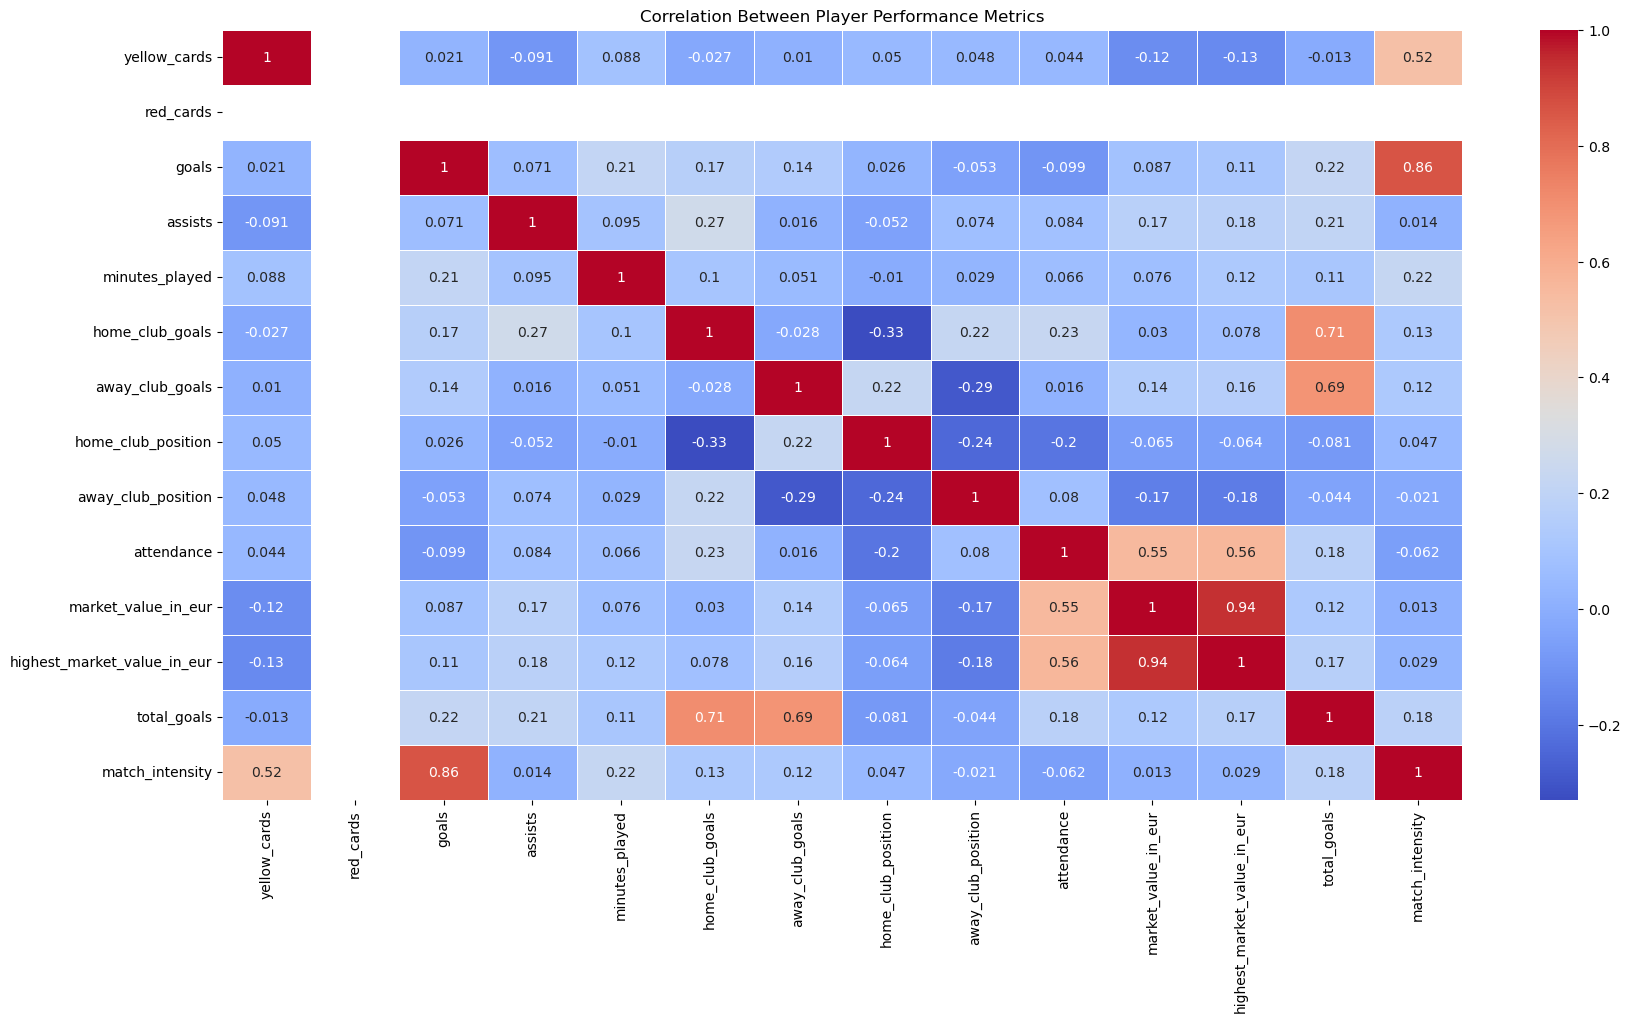

In [184]:
attributes = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
              'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position',
              'attendance', 'market_value_in_eur', 'highest_market_value_in_eur',
               'total_goals', 'match_intensity']
corr_matrix = df[attributes].corr()

# Plotting
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Player Performance Metrics")
plt.show()

### K-Means clustering

### How can we group football players based on their playing attributes (foot preference) andminutes played using K-Means clustering?-label encode
#x=height in cm,foot,country

In [185]:
required_kmeans_df=df[["height_in_cm","minutes_played"]]
test_required_kmeans=test_data[["height_in_cm","minutes_played"]]
required_kmeans=pd.concat([required_kmeans_df,test_required_kmeans],axis=0)
required_kmeans

,height_in_cm,minutes_played
0,186.0,70
1,186.0,70
2,186.0,70
3,186.0,70
4,186.0,70
...,...,...
3634,176.0,77
3635,176.0,77
3636,176.0,77
0,177.0,58


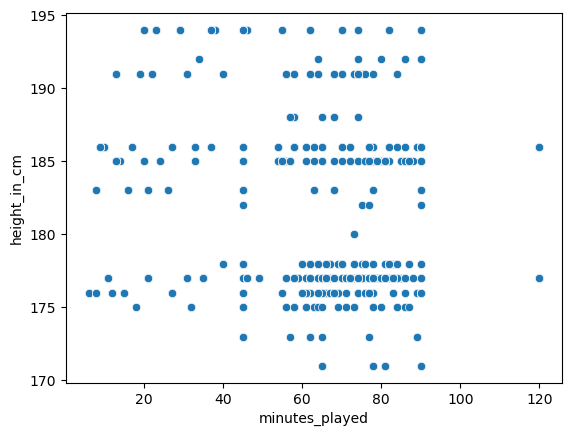

In [186]:
sns.scatterplot(data=df,y='height_in_cm',x='minutes_played')
plt.show()

In [ ]:
# label_encoder=preprocessing.LabelEncoder()
# required_kmeans["country_of_birth_encoder"]=label_encoder.fit_transform(required_kmeans["country_of_birth"])


In [ ]:
# required_kmeans=required_kmeans.drop(["country_of_birth"],axis=1)

In [187]:
scale=StandardScaler()
scd_df=scale.fit_transform(required_kmeans)
scd_df=pd.DataFrame(scd_df,columns=required_kmeans.columns)
scd_df

,height_in_cm,minutes_played
0,0.680466,-0.000131
1,0.680466,-0.000131
2,0.680466,-0.000131
3,0.680466,-0.000131
4,0.680466,-0.000131
...,...,...
3634,-0.882407,0.333417
3635,-0.882407,0.333417
3636,-0.882407,0.333417
3637,-0.726120,-0.571927


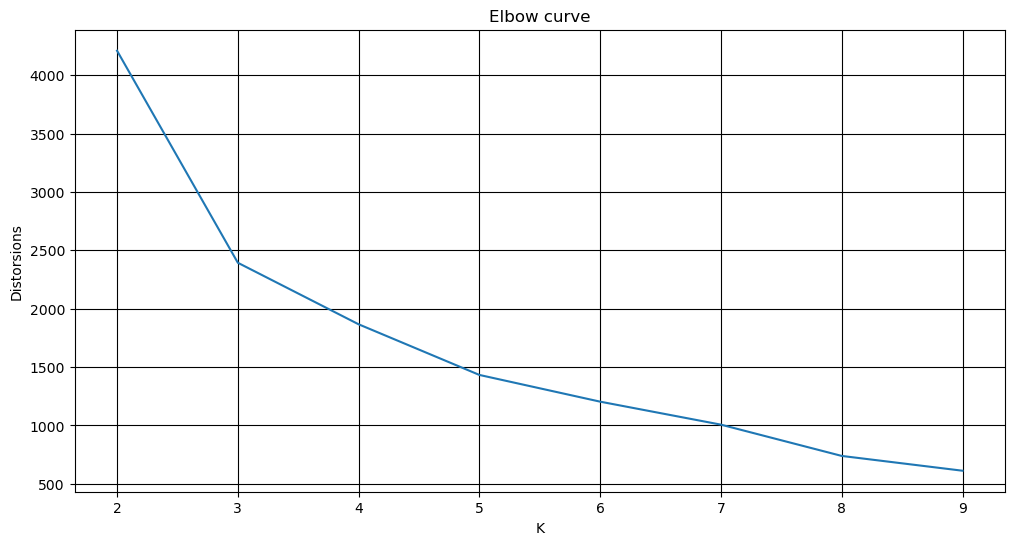

In [188]:
from sklearn.cluster import KMeans
Distorsions =[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(scd_df)
    Distorsions.append(KMeans_model.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(2,10),Distorsions)
plt.grid(True,c="black")
plt.xlabel("K")
plt.ylabel("Distorsions")
plt.title("Elbow curve")
plt.show()

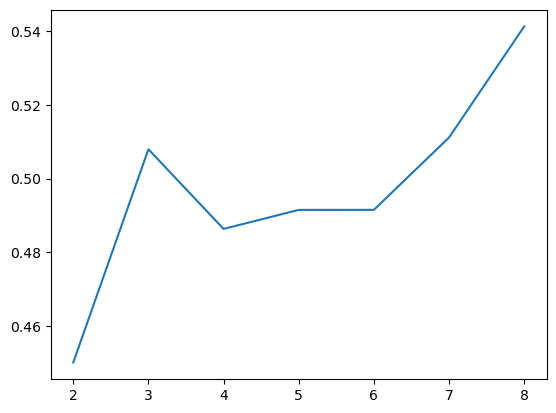

In [189]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sil_score=[]
for i in range(2,9):
    sil_score.append(silhouette_score(scd_df,KMeans(n_clusters=i,random_state=10).fit_predict(scd_df)))
plt.plot(range(2,9),sil_score)
plt.show()

In [190]:
KMean_model=KMeans(n_clusters=3,random_state=10)
KMean_model.fit(scd_df)
KMean_centroid=KMean_model.cluster_centers_
print(KMean_centroid)

labels=KMean_model.labels_
labels

[[-0.78612405  0.39759189]
 [ 1.08133349  0.45152414]
 [ 0.33502171 -1.59311691]]


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
required_kmeans.values

for n_clusters = 2 the avg silhouette_score is = 0.5727563693364385
for n_clusters = 3 the avg silhouette_score is = 0.49658744970451996
for n_clusters = 4 the avg silhouette_score is = 0.41034657780361206
for n_clusters = 5 the avg silhouette_score is = 0.43360631912330544
for n_clusters = 6 the avg silhouette_score is = 0.4425903323363047
for n_clusters = 7 the avg silhouette_score is = 0.4551962529226175
for n_clusters = 8 the avg silhouette_score is = 0.45487734255872475
for n_clusters = 9 the avg silhouette_score is = 0.4867811880165749
for n_clusters = 10 the avg silhouette_score is = 0.5137801207591938


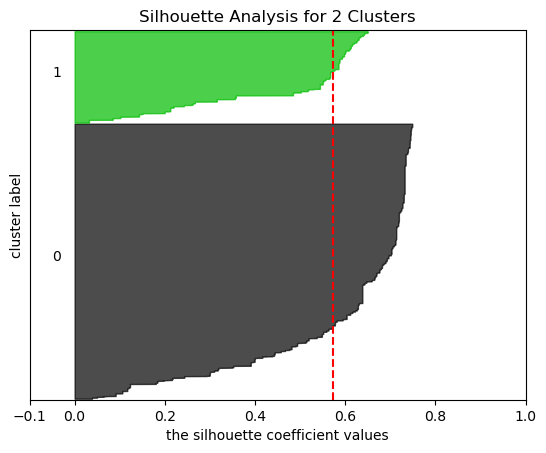

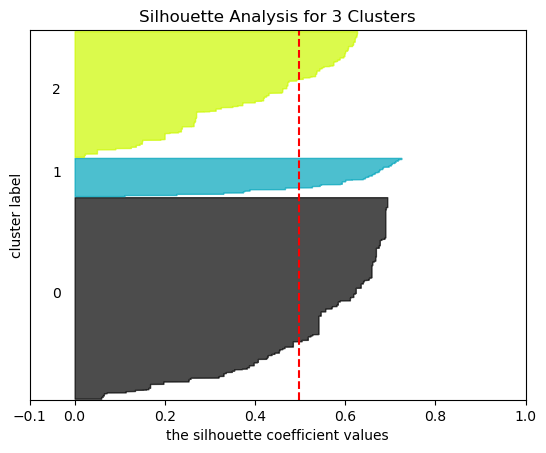

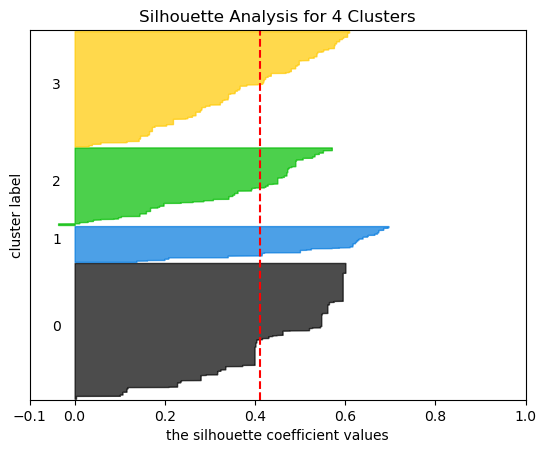

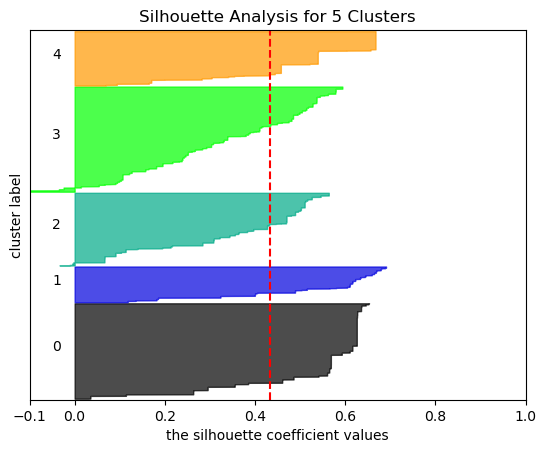

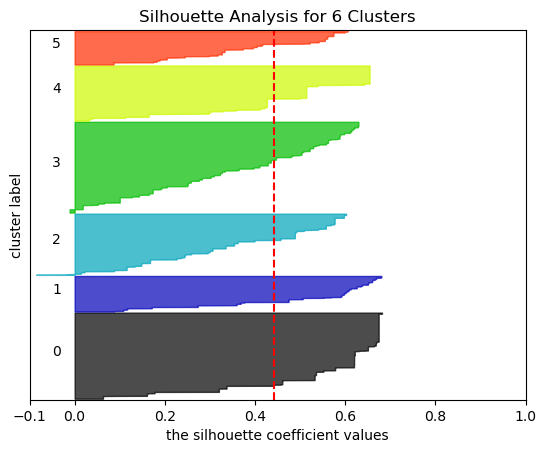

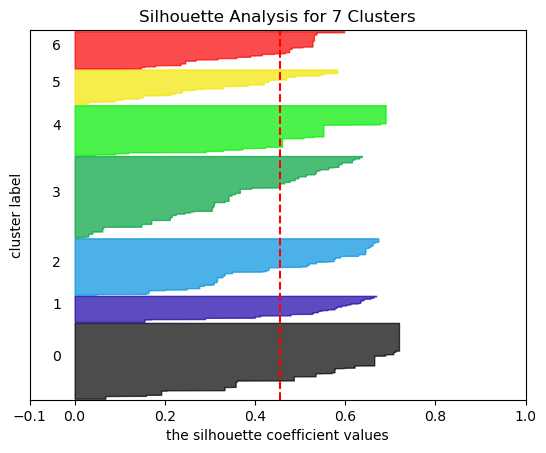

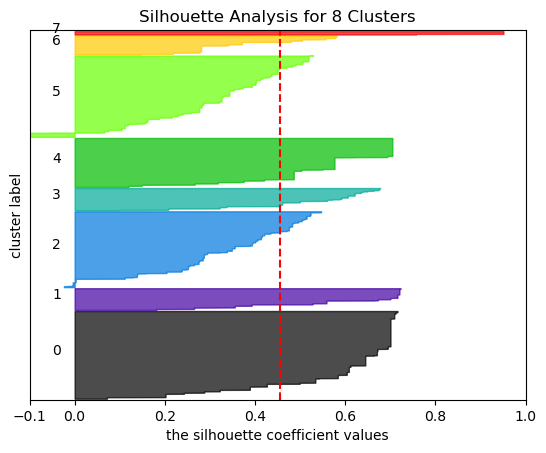

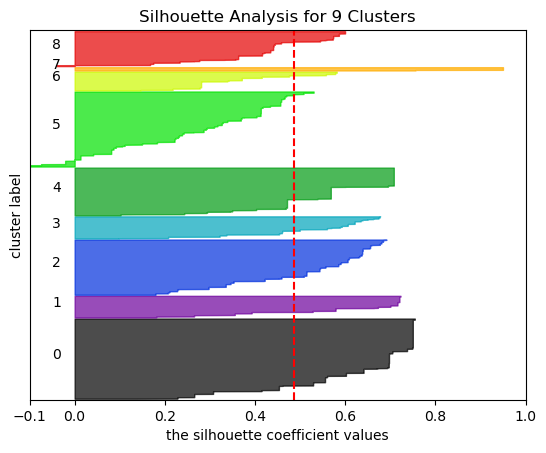

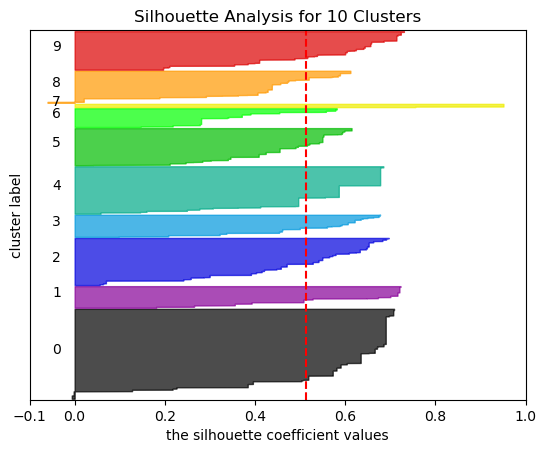

In [191]:
X = required_kmeans.values 
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    figure,ax1 = plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X) + (n_clusters + 1)* 10])
    cluster = KMeans(n_clusters = n_clusters,random_state=10)
    cluster_labels = cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    print('for n_clusters =',n_clusters,'the avg silhouette_score is =',silhouette_avg)
    # compute the silhouette score for each sample
    sample_silhouette_values = silhouette_samples(X,cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values = np.sort(ith_cluster_silhouette_values) # sorting the score for the current cluster in the ascending order.

        size_cluster_i =  ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i)/n_clusters)
       
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor = color,edgecolor = color,alpha = 0.7)    #label the sil plots with their cluster numbers at the middle
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        
    #compute the new y_lower for the next plot
        y_lower = y_upper + 10
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    ax1.set_title(f'Silhouette Analysis for {n_clusters} Clusters')
    # the vertical line for average sil scores of all the values
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()

In [192]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

calinski_score=calinski_harabasz_score(scd_df,labels)
print('calinski_score is:',calinski_score)

davies_score=davies_bouldin_score(scd_df,labels)
print('davies_score is:',davies_score)

calinski_score is: 3710.4417213258785
davies_score is: 0.8083793456400291


### INTERPRETATION:
- K-Means clustered scd_df into 3 groups. 
- A high Calinski-Harabasz score (3710) suggests good cluster separation, while a moderate Davies-Bouldin score (0.80) indicates some may overlap

# 10. Contract Management

### - Descriptive analysis and Visualization

### 1) What is the distribution of contract expiration dates across different seasons?


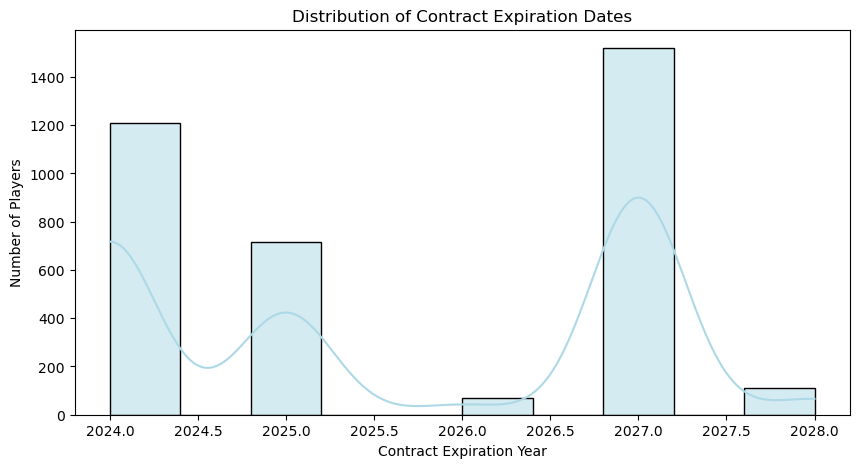

In [193]:
df['contract_year'] = pd.to_datetime(df['contract_expiration_date']).dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df['contract_year'], bins=10, kde=True, color='lightblue')
plt.xlabel("Contract Expiration Year")
plt.ylabel("Number of Players")
plt.title("Distribution of Contract Expiration Dates")
plt.show()

Interpretation:
This visualization helps clubs prepare for contract renewals, player retention, and scouting potential replacements before contracts expire.

### 2) Agents managing the highest market value players

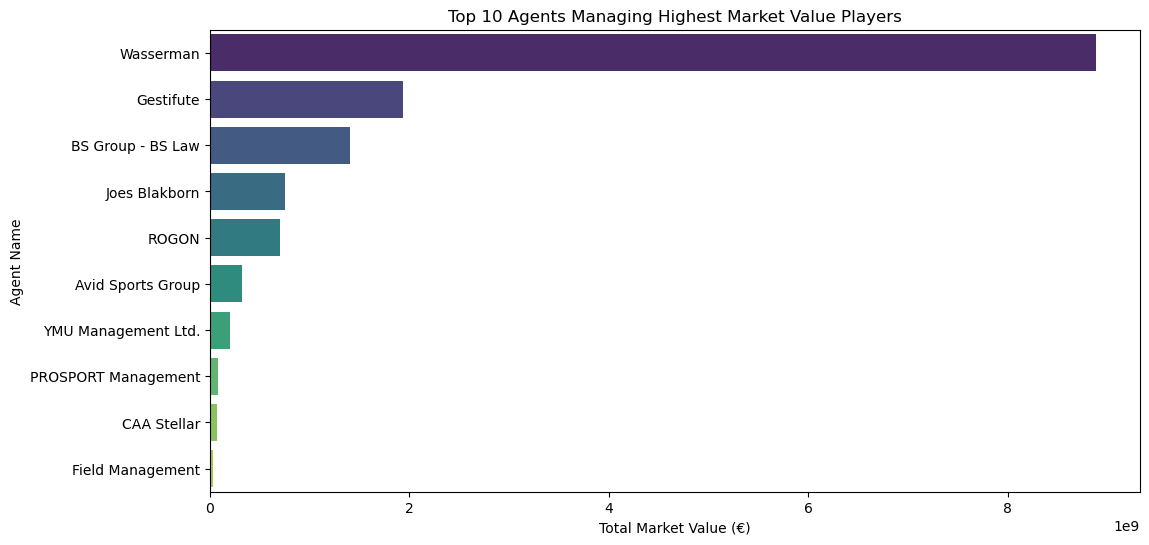

In [194]:
top_agents = df.groupby('agent_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_agents.values, y=top_agents.index, palette='viridis')
plt.xlabel("Total Market Value (€)")
plt.ylabel("Agent Name")
plt.title("Top 10 Agents Managing Highest Market Value Players")
plt.show()

Interpretation:
Identifying top agents helps clubs negotiate effectively and track high-profile player movements.

In [ ]:
#substitution analysis
#team wise avg substitution tym in the football match
#team wise substitutution frequency from home club names
#event analysis
#how do specific events(goals,cards,substitutions)corr with match results-gameid,goals(h,a),cards(y,r)-create sep df and count total event
#-- to achieve this qn create a new df with relevant col
#-- calc total events=(goals,yc,redc)for each match
#-- check the corr matrix for new df and visulise
#what is the impact of key events of fan engagement and overall match excitement
#goals nd minutes scatter
#match and attendace scatter
#hypothesis qn(9)
#is there a signifi diff in the avg number of goals scored by players of diff preferred foot(left or right)
#select 35 random samples of the avg number of goals scored by the players from the given data
#use the 5% sig level for the test
#h0:no sig diff
#h1:is a sig diff
#two tailed (z-test)

#country
#player dem wise avg goals
#position 

#kmeans clustering(10)
#identify grps of players on their attributes(foot) and demographics(country of birth)-label encode
#x=height in cm,foot,country

#contract management-market value,min played,agent name,name,player id,exp date



